# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce
import matplotlib
from past.builtins import xrange
from textwrap import wrap
from matplotlib import cm
import random
import matplotlib.colors as mcolors
import seaborn as sns

In [70]:
prefix   = 'E:/ML Fire/EPRI-Data/EPRI_OG/'
plot     = 'Plots/'
old      = 'Old/'
updated  = 'Updated/'
updated_data = 'Updated Data/'
up_data_plot =  'Updated Data/Plots/'
sys_plot = os.path.join(prefix, plot)
sys_old  = os.path.join(prefix, old)
sys_updated = os.path.join(prefix, updated)
sys_up_data = os.path.join(prefix, updated_data)
sys_up_dplo = os.path.join(prefix, up_data_plot)

# Import EPRI data

**1990-2009**

In [3]:
EPRI_90_09 = 'EPRI.xlsx'

# Extracting Data-frames 
FES_o = pd.read_excel(EPRI_90_09, sheet_name = 'Fire Event Summaries')
FEA_o = pd.read_excel(EPRI_90_09, sheet_name = 'Fire Event Attributes')
FSE_o = pd.read_excel(EPRI_90_09, sheet_name = 'Fire Severity Evaluation')
FTS_o = pd.read_excel(EPRI_90_09, sheet_name = 'Fire Timeline and Suppression')
PR_o  = pd.read_excel(EPRI_90_09, sheet_name = 'Plant Response')

epri_o = [FES_o, FEA_o, FSE_o, FTS_o, PR_o]

In [4]:
print(FES_o.shape, FEA_o.shape, FSE_o.shape, FTS_o.shape, PR_o.shape)

(2186, 11) (1972, 12) (2190, 7) (1816, 14) (1976, 9)


**2010-2014**

In [5]:
EPRI_10_14 = 'EPRI_10_14.xlsx'

# Extracting Data-frames 
FES_n = pd.read_excel(EPRI_10_14, sheet_name = 'Fire Event Summaries')
FEA_n = pd.read_excel(EPRI_10_14, sheet_name = 'Fire Event Attributes')
FSE_n = pd.read_excel(EPRI_10_14, sheet_name = 'Fire Severity Evaluation')
FTS_n = pd.read_excel(EPRI_10_14, sheet_name = 'Fire Timeline and Suppression')
PR_n  = pd.read_excel(EPRI_10_14, sheet_name = 'Plant Response')

epri_n = [FES_n, FEA_n, FSE_n, FTS_n, PR_n]

In [6]:
print(FES_n.shape, FEA_n.shape, FSE_n.shape, FTS_n.shape, PR_n.shape)

(140, 12) (140, 20) (140, 7) (140, 15) (140, 9)


**Appending Sheets**

In [7]:
FES_up = pd.concat([FES_o, FES_n], ignore_index=True)

In [8]:
FEA_up = pd.concat([FEA_o, FEA_n], ignore_index = True)

In [9]:
FSE_up = pd.concat([FSE_o, FSE_n], ignore_index = True)

In [10]:
FTS_up = pd.concat([FTS_o, FTS_n], ignore_index = True)

In [11]:
PR_up  = pd.concat([PR_o, PR_n], ignore_index = True)

In [12]:
FES_up.to_excel(sys_updated + 'FES.xlsx')
FEA_up.to_excel(sys_updated + 'FEA.xlsx')
FSE_up.to_excel(sys_updated + 'FSE.xlsx')
FTS_up.to_excel(sys_updated + 'FTS.xlsx')
PR_up.to_excel(sys_updated + 'PR.xlsx')

In [13]:
EPRI_uplist = [FES_up, FEA_up, FSE_up, FTS_up, PR_up]

**Merging Sheets**

In [14]:
EPRI_up = reduce(lambda x,y: pd.merge(x,y, on='FireID', how='outer', sort = True), EPRI_uplist)

# Data Cleanup

**Disposition**

In [15]:
EPRI_up['Disposition_FES'].unique()

array(['Undetermined', 'Not Challenging', 'Challenging', nan,
       'Not Evaluated', 'Potentially Challenging',
       'Undetermined (NC‐PC) ', 'Undetermined (PC‐CH)',
       'Undetermined (NC‐PC)', 'Not Challenging ',
       'Potentially Challenging ', ' Not\xa0Challenging',
       'Not\xa0Challenging', 'Potentially\xa0Challenging',
       'Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH)',
       ' Undetermined\xa0(PC‐CH)', ' Challenging',
       ' Undetermined\xa0(NC‐PC)', ' Potentially\xa0Challenging',
       'Undetermined(NC‐PC)', 'Undetermined (PC-CH)',
       'Not+D20421:D20432Challenging', 'Undetermined (NC-PC)',
       'Not Challenging/Undeter', '12/2/2011'], dtype=object)

In [16]:
EPRI_up['Disposition_FES'] = EPRI_up['Disposition_FES'].replace(['Potentially\xa0Challenging', ' Potentially\xa0Challenging', 'Potentailly Challenging ',
                                                      ' Not\xa0Challenging', 'Not\xa0Challenging',
                                                       'Undetermined\xa0(NC‐PC)', 'Undetermined\xa0(PC‐CH)', ' Undetermined\xa0(PC‐CH)', ' Undetermined\xa0(NC‐PC)',
                                                      'Undetermined(NC‐PC)', 'Not+D20421:D20432Challenging', ' Challenging', 'Undetermined (NC‐PC) ', 'Undetermined (PC-CH)',
                                                                            'Not Challenging ', 'Potentially Challenging '],
                                                      ['Potentially Challenging', 'Potentially Challenging', 'Potentially Challenging',
                                                      'Not Challenging', 'Not Challenging', 
                                                      'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)', 'Undetermined (PC‐CH)', 'Undetermined (NC‐PC)',
                                                      'Undetermined (NC‐PC)', 'Not Challenging', 'Challenging', 'Undetermined (NC‐PC)', 'Undetermined (PC‐CH)',
                                                      'Not Challenging', 'Potentially Challenging'])

EPRI_up['Disposition_FES'] = EPRI_up['Disposition_FES'].replace(['Not Challenging/Undeter', '12/2/2011', 'Undetermined'],
                                                               np.nan)
EPRI_up['Disposition_FES'] = EPRI_up['Disposition_FES'].replace(['Undetermined (NC-PC)'],
                                                               'Undetermined (NC‐PC)')

#EPRI_up['Disposition_FES'].value_counts()

**Fire Type**

In [17]:
EPRI_up['Fire Type'].unique()

array(['Arc/electric discharge',
       'Flaming combustion – external to component', nan,
       'Smoldering combustion – internal to component',
       'Flaming combustion – internal to component', 'Explosion',
       'Unknown', 'laming combustion – external to component',
       'Other (specify)',
       'Fire not observed and fire type indeterminate from post‐inspectio',
       'Overheating – no smoldering or flaming combustion',
       'No Fire\xa0‐\xa0False actuation of detection device',
       'Flamingcombustion–internaltocomponent',
       'Firenotobservedandfiretypeindeterminatefrompost‐inspectio',
       'Firenotobservedandfiretypeindeterminatefrompost‐inspectio\nFireTypeUnknown:',
       'Smolderingcombustion–internaltocomponent',
       'Flamingcombustion–externaltocomponent',
       'Overheating–nosmolderingorflamingcombustion',
       'Smolderingcombustion–externaltocomponent',
       'Arc/electricdischarge', 'NoFire‐Falseactuationofdetectiondevice',
       'Other(specif

In [18]:
EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['laming combustion – external to component', 
                                                     'Flamingcombustion–externaltocomponent',
                                                    ': Flaming combustion – external to component',
                                                    'Flaming combustion – external to component '], 'Flaming combustion – external to component')

EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['Smolderingcombustion–internaltocomponent',
                                                    'Smoldering combustion – internal to componen'],
                                                    'Smoldering combustion – internal to component')

EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['Smolderingcombustion–externaltocomponent'],
                                                    'Smoldering combustion – external to component')

EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['Flamingcombustion–internaltocomponent',
                                                    'Flaming combustion – internal to componen',
                                                    ': Flaming combustion – internal to component'], 
                                                    'Flaming combustion – internal to component')
EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['Fire not observed and fire type indeterminate from post‐inspectio',
                                                    'Firenotobservedandfiretypeindeterminatefrompost‐inspectio',
                                                    'Firenotobservedandfiretypeindeterminatefrompost‐inspectio\nFireTypeUnknown:',
                                                    ' Fire not observed and fire type indeterminate from post‐inspectio',
                                                    'Fire not observed and fire type indeterminate from post‐inspectio\n',
                                                    'Fire not observed and fire type indeterminate from post-inspection'], 
                                                    'Fire not observed and fire type indeterminate from post‐inspection')
EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['Arc/electricdischarge',
                                                    ': Arc/electric discharge',
                                                    ' Arc/electric discharge'],
                                                   'Arc/electric discharge')

EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['No Fire\xa0‐\xa0False actuation of detection device',
                                                    'NoFire‐Falseactuationofdetectiondevice'],
                                                   'No Fire ‐ False actuation of detection device')

EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['Overheating – no  or flaming combustion',
                                                    'Overheating–nosmolderingorflamingcombustion',
                                                    'verheating – no smoldering or flaming combustion'],
                                                    'Overheating – no smoldering or flaming combustion')

EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['Other(specify)',
                                                    'Other (specify', 'Mechanicalequipmentmalfunction/failure'],
                                                   ['Other (specify)', 
                                                    'Other (specify)', 'Mechanical equipment malfunction/failure'])

EPRI_up['Fire Type'] = EPRI_up['Fire Type'].replace(['Mechanical equipment malfunction/failure',
                                                     'Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
                                                     'Other electrical or electronic equipment', 
                                                     'Hot work (cutting/welding/grinding/etc.)', 
                                                     'Light smoke coming from ignition source\xa0‐\xa0minor or no visibility reduction in vicinity of fire', 
                                                     'Temporary electrical wiring or equipment'],
                                                   np.nan)

In [19]:
EPRI_up['Fire Type'].value_counts()

Flaming combustion – external to component                            763
Flaming combustion – internal to component                            359
Smoldering combustion – internal to component                         244
Overheating – no smoldering or flaming combustion                     223
Arc/electric discharge                                                154
Smoldering combustion – external to component                         115
Other (specify)                                                       100
Fire not observed and fire type indeterminate from post‐inspection     51
Unknown                                                                36
Explosion                                                              21
No Fire ‐ False actuation of detection device                          11
Name: Fire Type, dtype: int64

**Fire Cause**

In [20]:
EPRI_up['Fire Cause'].unique()

array(['High Energy Arc Fault', 'Electrical arcing or sparks (non‐HEAF)',
       'Mechanical equipment malfunction/failure', nan,
       'Electrical failure resulting in overheating materials',
       'Hot work (cutting/welding/grinding/etc.)',
       'Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
       'Other (other personnel error, natural effect, etc. specify in comments)',
       'Misuse of heating devices', 'Unknown',
       'Personnel error during test and maintenance activity',
       'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)',
       'High Energy Arc Fault (HEAF)', 'Mechanical malfunction/failure',
       'Electrical Failure (overheating, spark, HEAF)',
       'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition）',
       'Explosion (hydrogen gas ignition, fuel vapor ignition)',
       'Personnel error: Misuse of heating devices',
       'Electrical malfunction/

In [21]:
EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['High Energy Arc Fault', 'HighEnergyArcFault(HEAF)',
                                                      'High Energy Arc Fault (HEAF'],
                                                     'High Energy Arc Fault (HEAF)')

EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['Electricalarcingorsparks(non‐HEAF)', 'Electrical arcing or sparks (non‐HEAF',
                                                      'Electrical arcing or sparks (non‐HEAF)\n'],
                                                     'Electrical arcing or sparks (non‐HEAF)')

EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['Electricalfailureresultinginoverheatingmaterials',
                                                      ':Electricalfailureresultinginoverheatingmaterials',
                                                      ':Electricalfailureresultinginoverheatingmaterials',
                                                      'vElectrical failure resulting in overheating materials',
                                                      ': Electrical failure resulting in overheating materials',
                                                      'Electrical failure resulting in overheating materials\n',
                                                      ' Electrical failure resulting in overheating materials'],
                                                     'Electrical failure resulting in overheating materials')

EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['OverheatedMaterial(lubeoil,pumppacking,thermalinsulation,etc.)',
                                                      ' Overheated Material (lube oil, pump packing, thermal insulation, etc.)',
                                                      ' Overheated Material (lube oil, pump packing, thermal insulation, etc',
                                                      'Overheated Material (lube oil, pump packing, thermal insulation, etc.'],
                                                     'Overheated Material (lube oil, pump packing, thermal insulation, etc.)')

EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['Hotwork(cutting/welding/grinding/etc.)',
                                                      'Hot work (cutting/welding/grinding/etc',
                                                      'Hot work (cutting/welding/grinding/etc.'],
                                                     'Hot work (cutting/welding/grinding/etc.)')

EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['Other(otherpersonnelerror,naturaleffect,etc.specifyincomments)',
                                                      'Other (personnel error, natural effect, etc. specify in comments)',
                                                      'Other (other personnel error, natural effect, etc. specify in comments'],
                                                     'Other (other personnel error, natural effect, etc. specify in comments)')

EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition）',
                                                      'Explosion (hydrogen gas ignition, fuel vapor ignition)'],
                                                     'Explosion (hydrogen gas ignition, fuel vapor ignition, other volatile fluid vapor ignition)')

EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['Personnelerrorduringtestandmaintenanceactivity', 'Unkno', 
                                                       'Mechanicalequipmentmalfunction/failure', 'Mechanical malfunction/failure',
                                                      'Misuse of heating devices'],
                                                      ['Personnel error during test and maintenance activity', 'Unknown', 
                                                       'Mechanical equipment malfunction/failure', 'Mechanical equipment malfunction/failure',
                                                      'Personnel error: Misuse of heating devices'])

EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['Flamingcombustion–externaltocomponent', 'Not Challenging',
                                                       'In‐Situ', 'Potentially Challenging', 'Transient',
                                                       'Trash (i.e., solid refuse collected for disposal)', '', 'Arc/electricdischarge',
                                                                  'Electrical malfunction/failure', 'Electrical Failure (overheating, spark, HEAF)'],
                                                     np.nan)
EPRI_up['Fire Cause'] = EPRI_up['Fire Cause'].replace(['Electrical arcing or sparks (non‐HEAF)'],
                                                     'Electrical arcing or sparks (non-HEAF)')

In [22]:
EPRI_up['Fire Cause'].value_counts()

Electrical failure resulting in overheating materials                                          627
Hot work (cutting/welding/grinding/etc.)                                                       492
Overheated Material (lube oil, pump packing, thermal insulation, etc.)                         308
Electrical arcing or sparks (non-HEAF)                                                         222
Other (other personnel error, natural effect, etc. specify in comments)                        137
Unknown                                                                                         97
Mechanical equipment malfunction/failure                                                        93
Personnel error: Misuse of material ignited                                                     25
Personnel error: Misuse of heating devices                                                      24
High Energy Arc Fault (HEAF)                                                                    17
Personnel 

**Building**

In [23]:
EPRI_up['Building'].unique()

array(['Main Transformer or Switch Yard', 'Other (Specify in comments)',
       nan, 'Auxiliary Building (PWR)',
       'Main Transformer or Switch Yard ', 'Turbine Building',
       'Control building', 'Diesel Generator Building',
       'Radwaste Building', 'Containment (PWR)', 'Drywell (BWR)',
       'Other (Specify in comments) ', 'Reactor Building (BWR)',
       'Circulating Water Pump house/Intake Structure',
       'Service Water Pump house', 'Containment\xa0(PWR) ',
       'Turbine\xa0Building ', 'Other\xa0(Specify\xa0in\xa0comments) ',
       'Auxiliary\xa0Building\xa0(PWR) ', ' Main\xa0Control\xa0Room',
       ' Turbine\xa0Building ', 'Radwaste\xa0Building ',
       'Diesel\xa0Generator\xa0Building ',
       'Circulating\xa0Water\xa0Pump\xa0house/Intake\xa0Structure ',
       'Service\xa0Water\xa0Pump\xa0house ',
       'Reactor\xa0Building\xa0(BWR) ', 'Radwaste\xa0Building',
       ' Other\xa0(Specify\xa0in\xa0comments) ',
       ' Reactor\xa0Building\xa0(BWR) ',
       'Mai

In [24]:
EPRI_up['Building'] = EPRI_up['Building'].replace(['Main Transformer or Switch Yard ',
                                                              'Main\xa0Transformer\xa0or\xa0Switch\xa0Yard ',
                                                              'Main\xa0Transformer\xa0or\xa0Switch\xa0Yard',
                                                              ' Main Transformer or Switch Yard'],
                                                             'Main Transformer or Switch Yard')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Auxiliary\xa0Building\xa0(PWR) ',
                                                              'Auxiliary\xa0Building\xa0(PWR)',
                                                              ' Auxiliary Building (PWR)'],
                                                             'Auxiliary Building (PWR)')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Turbine\xa0Building ',
                                                              ' Turbine\xa0Building ',
                                                              'Turbine\xa0Building',
                                                              ' Turbine Building'],
                                                             'Turbine Building')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Reactor\xa0Building\xa0(BWR) ',
                                                              'Reactor\xa0Building\xa0(BWR)',
                                                              ' Reactor Building (BWR)',
                                                              ' Reactor\xa0Building\xa0(BWR) '],
                                                             'Reactor Building (BWR)')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Radwaste\xa0Building ',
                                                              'Radwaste\xa0Building',
                                                              ' Radwaste\xa0Building',
                                                              ' Radwaste Building'],
                                                             'Radwaste Building')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Other (Specify in comments) ',
                                                              'Other\xa0(Specify\xa0in\xa0comments) ',
                                                              ' Other\xa0(Specify\xa0in\xa0comments) ',
                                                              ': Other (Specify in comments)',
                                                              'Other\xa0(Specify\xa0in\xa0comments)',
                                                              ' Other (Specify in comments)',
                                                              'Other (Specify in comment', 'Other\xa0(Specify\xa0in\xa0comments',
                                                  'Other (specify in comments)'],
                                                             'Other (Specify in comments)')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Diesel\xa0Generator\xa0Building ',
                                                              'Diesel\xa0Generator\xa0Building',
                                                               'Diesel\xa0Generator\xa0Buildin',
                                                              ' Diesel Generator Building'],
                                                             'Diesel Generator Building')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Circulating\xa0Water\xa0Pump\xa0house/Intake\xa0Structure ',
                                                              'Circulating\xa0Water\xa0Pump\xa0house/Intake\xa0Structure',
                                                              ' Circulating Water Pump house/Intake Structure'],
                                                             'Circulating Water Pump house/Intake Structure')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Containment\xa0(PWR) ',
                                                              ' Containment (PWR)'],
                                                             'Containment (PWR)')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Drywell\xa0(BWR) ',
                                                              ' Drywell (BWR)'],
                                                             'Drywell (BWR)')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Control\xa0building ',
                                                              ' Control building'],
                                                             'Control building')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Service\xa0Water\xa0Pump\xa0house ',
                                                              'Main Control Room'],
                                                              ['Service Water Pump house',
                                                              np.nan])

EPRI_up['Building'] = EPRI_up['Building'].replace(['Potentially Challenging', ' ',
                                                               'Not Challenging', ' Main\xa0Control\xa0Room'],
                                                             np.nan)

EPRI_up['Building'] = EPRI_up['Building'].replace(['Turbine Building, Other (specify'],
                                                 'Turbine Building')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Challenging', 'Battery Room',
                                                  'Sewage Treatment', 'Warehouse'], np.nan)

EPRI_up['Building'] = EPRI_up['Building'].replace(['Circulating Water Pump house/'],
                                                  'Circulating Water Pump house/Intake Structure')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Main Transformer or Switch Yar'],
                                                  'Main Transformer or Switch Yard')

EPRI_up['Building'] = EPRI_up['Building'].replace(['Main Transformer or Switch Yar'],
                                                  'Main Transformer or Switch Yard')

EPRI_up['Building'].value_counts()

Other (Specify in comments)                      586
Turbine Building                                 440
Containment (PWR)                                137
Diesel Generator Building                        112
Auxiliary Building (PWR)                          99
Reactor Building (BWR)                            97
Main Transformer or Switch Yard                   85
Control building                                  74
Circulating Water Pump house/Intake Structure     56
Radwaste Building                                 43
Drywell (BWR)                                     23
Service Water Pump house                          17
Name: Building, dtype: int64

**Combustible Group**

In [25]:
EPRI_up['Combustible Group'].unique()

array(['Transient', 'Liquid', 'Gas', nan, 'In‐Situ', 'Insulation',
       'Unknown', 'Transient (Liquid)', 'Transient (Gas)', 'Unkno',
       'Transient(Gas)', 'n‐Situ',
       'Other (other personnel error, natural effect, etc. specify in comments)',
       'Other electrical or electronic equipment',
       'Hot work (cutting/welding/grinding/etc.)',
       'Mechanical equipment malfunction/failure', '3/19/2001',
       '3/19/2002', 'Electrical arcing or sparks (non‐HEAF)',
       'Overheating – no smoldering or flaming combustion',
       'Transient (Gas', 'In-Situ', 'In Situ', 'nsulation'], dtype=object)

In [26]:
EPRI_up['Combustible Group'] = EPRI_up['Combustible Group'].replace(['Other (other personnel error, natural effect, etc. specify in comments)', 
                                                         'Other electrical or electronic equipment', 'Hot work (cutting/welding/grinding/etc.)',
                                                         'Mechanical equipment malfunction/failure', '3/19/2001', '3/19/2002', 'Electrical arcing or sparks (non‐HEAF)',
                                                         'Overheating – no smoldering or flaming combustion',],
                                                        np.nan) 

EPRI_up['Combustible Group'] = EPRI_up['Combustible Group'].replace(['n‐Situ', 'Unkno'],
                                                       ['In‐Situ', 'Unknown'])

EPRI_up['Combustible Group'] = EPRI_up['Combustible Group'].replace(['Transient(Gas)', 'Transient (Gas'],
                                                       'Transient (Gas)')

EPRI_up['Combustible Group'] = EPRI_up['Combustible Group'].replace(['In‐Situ', 'In-Situ', 'In Situ'], 'In_Situ')

EPRI_up['Combustible Group'] = EPRI_up['Combustible Group'].replace('Transient (Gas)', 'Transient_Gas')

EPRI_up['Combustible Group'] = EPRI_up['Combustible Group'].replace('Transient (Liquid)', 'Transient_Liquid')

EPRI_up['Combustible Group'] = EPRI_up['Combustible Group'].replace(['nsulation'], 'Insulation')

# EPRI_up['Combustible Group'].value_counts()

**Combustible Group Type**

In [213]:
EPRI_up['Type'].unique()

array([nan, 'Transformer Oil', 'Hydrogen',
       'Other electrical or electronic equipment',
       'Cellulosic materials including wood, paper or other solid transients',
       'Lube Oil or Grease', 'Mixed', 'Interior finish',
       'Temporary electrical wiring or equipment',
       'Temporary thermal insulation materials',
       'Trash (i.e., solid refuse collected for disposal)',
       'Other (Specify)', 'Structural component', 'Type not specified',
       'Fuel Oil', 'Plastic Sheets', 'Cleaning solvents or paint',
       'Thermoset', 'Acetylene'], dtype=object)

In [80]:
EPRI_up['Type'] = EPRI_up['Type'].replace(['LubeOilorgrease',
                                                      'Otherelectricalorelectronicequipmen',
                                                      'Otherelectricalorelectronicequipment',
                                                      'Temporaryelectricalwiringorequipment',
                                                      'Thermalinsulationmaterials',
                                                      'Trash(i.e.,solidrefusecollectedfordisposal)',
                                                      'Temporarythermalinsulationmaterials',
                                                      'Cleaningsolventsorpaint',
                                                      'Cellulosicmaterialsincludingwood,paperorothersolidtransients',
                                                      'Cellulosic materials including wood, paper or other solid transients\nForm\nN',
                                                      'Structuralcomponen',
                                                      'Structuralcomponen',
                                                       'Structuralcomponent',
                                                       'Other(specif', 'Other(specify)', 'Other(specify', 'Other (specify',
                                                       'Trash (i.e., solid refuse collected for disposal',
                                                       'Typenotspecified',
                                          'Cellulosic materials including wood, paper or ot',
                                          'Thermal insulation materials',
                                          'Other Transient Combustible (specify)',
                                          'Other (specify)',
                                          'Other (specify)'],
                                                     ['Lube Oil or grease',
                                                     'Other electrical or electronic equipment',
                                                     'Other electrical or electronic equipment',
                                                     'Temporary electrical wiring or equipment',
                                                     'Thermal insulation materials',
                                                     'Trash (i.e., solid refuse collected for disposal)',
                                                     'Temporary thermal insulation materials',
                                                     'Cleaning solvents or paint',
                                                     'Cellulosic materials including wood, paper or other solid transients',
                                                     'Cellulosic materials including wood, paper or other solid transients',
                                                     'Structural component',
                                                     'Structural component',
                                                      'Structural component', 'Other (specify)', 'Other (specify)', 'Other (specify)', 'Other (specify)',
                                                      'Trash (i.e., solid refuse collected for disposal)',
                                                      'Type not specified',
                                                     'Cellulosic materials including wood, paper or other solid transients',
                                                     'Temporary thermal insulation materials',
                                                     'Other (Specify)',
                                                     'Other (Specify)',
                                                     'Other (Specify)'])

EPRI_up['Type'] = EPRI_up['Type'].replace(['Other electrical or electronic equipmentOther electrical or electronic equipment',
                                                      'Other electrical or electronic equipment\n',
                                                      'Other electrical or electronic euiment',
                                                      ],
                                                     'Other electrical or electronic equipment')

EPRI_up['Type'] = EPRI_up['Type'].replace(['Flaming combustion – external to component',
                                                      'Transient', 'Liquid',
                                                      'Confined to the object of origin (localized/single subcomponent)',
                                                      'No damage', 'Temporary ',
                                                      'Fire not observed and fire type indeterminate from post‐inspecti',
                                                      'Hot work (cutting/welding/grinding/etc.)', 'In‐Situ',
                                          'Multiple Cables Not In Tray or Bundle',
                                          'Single Cable Tray',
                                          'Cable Tray Stack', 'Unknown'],
                                                     np.nan)

EPRI_up['Type'] = EPRI_up['Type'].replace(['Lube Oil or grease'],
                                         'Lube Oil or Grease')

EPRI_up['Type'] = EPRI_up['Type'].replace(['Other (specify)'],
                                         'Other (Specify)')

EPRI_up['Type'].value_counts()

Other electrical or electronic equipment                                723
Other (Specify)                                                         433
Cellulosic materials including wood, paper or other solid transients    155
Lube Oil or Grease                                                      145
Trash (i.e., solid refuse collected for disposal)                        99
Temporary thermal insulation materials                                   89
Temporary electrical wiring or equipment                                 79
Type not specified                                                       77
Structural component                                                     67
Hydrogen                                                                 40
Transformer Oil                                                          32
Plastic Sheets                                                           26
Fuel Oil                                                                 17
Interior fin

**Combustible Group Form**

In [29]:
EPRI_up['Form'].unique()

array([nan, 'Unconfined spill', 'Pressurized in a container',
       'Single Cable', 'Jet from a pressurized source', 'Unknown',
       'Leak ‐ Oil soaked Insulation',
       'Multiple Cables Not In Tray or Bundle',
       'Ambient pressure, within a component',
       'Spill confined by curbs or other physical feat',
       'Other (Specify)', 'Other (specify)', 'Contained within component',
       'Leak\xa0‐\xa0Oil soaked Insulation', 'Single Cable Tray',
       'Contained within reservoir', 'Leak‐OilsoakedInsulation',
       'SingleCable', 'Unconfinedspill', 'Pressurizedinacontainer',
       'Other(Specify)', 'Jetfromapressurizedsource', 'Other(specify)',
       'Spillconfinedbycurbsorotherphysicalfeat',
       'Containedwithincomponent', 'Containedwithinreservoir',
       'MultipleCablesNotInTrayorBundle',
       'Ambient pressure, within a compartment', 'Single Bundle',
       'Confined liquid spill', 'Pressurized spray', 'Other (specify',
       'Flaming combustion – external to c

In [30]:
EPRI_up['Form'] = EPRI_up['Form'].str.replace(r'\xa0', ' ')

EPRI_up['Form'] = EPRI_up['Form'].replace(['Leak‐OilsoakedInsulation'],
                                                     'Leak ‐ Oil soaked Insulation')

EPRI_up['Form'] = EPRI_up['Form'].replace(['MultipleCablesNotInTrayorBundle'],
                                                     'Multiple Cables Not In Tray or Bundle')

EPRI_up['Form'] = EPRI_up['Form'].replace(['Other (specify)', 'Other(Specify)',
                                                      'Other(specify)', 'Other (specify',
                                          'Other (Specify'],
                                                     'Other (Specify)')

EPRI_up['Form'] = EPRI_up['Form'].replace(['Unconfinedspill', 'Pressurizedinacontainer',
                                                      'Jetfromapressurizedsource', 'Spillconfinedbycurbsorotherphysicalfeat',
                                                      'Containedwithincomponent', 'Containedwithinreservoir', 'SingleCable',
                                          ],
                                                     ['Unconfined spill', 'Pressurized in a container',
                                                     'Jet from a pressurized source', 'Spill confined by curbs or other physical feat',
                                                     'Contained within component', 'Contained within reservoir', 'Single Cable'])

EPRI_up['Form'] = EPRI_up['Form'].replace(['Flaming combustion – external to component', 'Contained within'],
                                                      np.nan)

EPRI_up['Form'] = EPRI_up['Form'].replace(['NA, Insulation Multiple Bundles'],
                                         'Multiple Bundles')

EPRI_up['Form'] = EPRI_up['Form'].replace(['Leak ‐ Oil soaked Insulation', 'Leak - Oil soaked'],
                                         'Leak - Oil soaked Insulation')

EPRI_up['Form'].value_counts()

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Leak - Oil soaked Insulation                      105
Unconfined spill                                   48
Other (Specify)                                    46
Single Cable                                       37
Pressurized in a container                         23
Jet from a pressurized source                      22
Unknown                                            17
Contained within component                         16
Contained within reservoir                         10
Multiple Cables Not In Tray or Bundle               9
Type not specified                                  6
Ambient pressure, within a component                6
Spill confined by curbs or other physical feat      6
Single Cable Tray                                   4
Ambient pressure, within a compartment              3
Confined liquid spill                               1
 N/A                                                1
Single Bundle                                       1
Pressurized spray           

**System**

In [31]:
EPRI_up['System'].unique()

array(['Switchyard System', 'Medium Voltage Power System (601V to 35kV)',
       'Hydrogen Supply System', nan,
       'Medium Voltage Power System, Class 1E',
       'Main Generator Output Power System',
       'Fire in the Service Building.',
       'Low Voltage Power System, Class 1E',
       'Low Voltage Power System (600V and less)',
       'Emergency Onsite Power Supply System', 'Offgas System (BWR)',
       'General Ventillation Systems', 'Main Turbine System',
       'Feedwater System', 'Reactor Coolant System',
       'Main Generator System', 'DC Power System, class 1E',
       'Condensate System', 'Essential Service Water System',
       'Main Generator Hydrogen Cooling System', 'Electrical panel',
       'Reactor Core Isolation Cooling System (BWR)',
       'Instrument and Uninterruptible Power System',
       'Heat Rejection System (Circulating Water)',
       'Undetermined (PC‐CH)', 'DC Power System', 'Other',
       'Turbine Lube Oil System', 'Diesel Fuel Oil System',
   

In [32]:
EPRI_up['System'] = EPRI_up['System'].replace([' Switchyard\xa0System', 'Switchyard\xa0System',
                                                          ' Switchyard System'],
                                                         'Switchyard System')

EPRI_up['System'] = EPRI_up['System'].replace([' Low\xa0Voltage\xa0Power\xa0System\xa0(600V\xa0and\xa0less)',
                                                          'Low\xa0Voltage\xa0Power\xa0System\xa0(600V\xa0and\xa0less)',
                                                          ' Low Voltage Power System (600V and less)',
                                                          ' Low Voltage Power System (600V and less',
                                                          'Low Voltage Power System (600V and less'],
                                                         'Low Voltage Power System (600V and less)')
EPRI_up['System'] = EPRI_up['System'].str.replace(r'\xa0', ' ')

EPRI_up['System'] = EPRI_up['System'].replace([' General Ventillation Systems',' Non Essential Service Water System',
                                                           ' Essential Service Water System', ' Medium Voltage Power System (601V to 35kV)',
                                                           ' Reactor Recirculation System (BWR)', ' Other ', ' Medium Voltage Power System, Class 1E',
                                                           ' Feedwater System', ' DC Power System', 'Transformers ',
                                                          ' High Pressure Safety Injection System (PWR)', ' Emergency Onsite Power Supply System',
                                                          'Electric Motor', 'Pumps', 'Undetermined (PC‐CH)',
                                                          'Fire in the Service Building.', 'Electrical panel'],
                                                         ['General Ventillation Systems', 'Non Essential Service Water System',
                                                         'Essential Service Water System', 'Medium Voltage Power System (601V to 35kV)',
                                                         'Reactor Recirculation System (BWR)','Other', 'Medium Voltage Power System, Class 1E',
                                                         'Feedwater System', 'DC Power System', np.nan,
                                                         'High Pressure Safety Injection System (PWR)', 'Emergency Onsite Power Supply System',
                                                         np.nan, np.nan, np.nan, np.nan, np.nan])

EPRI_up['System'].value_counts()

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


General Ventillation Systems                  100
Emergency Onsite Power Supply System           97
Low Voltage Power System (600V and less)       88
Medium Voltage Power System (601V to 35kV)     65
Feedwater System                               41
                                             ... 
 Closed/Component Cooling Water                 1
 Reactor Coolant System                         1
Plant Protection System                         1
Fire Detection System                           1
 Diesel Fuel Oil System                         1
Name: System, Length: 65, dtype: int64

**Component Group**

In [33]:
EPRI_up['Component Group'].unique()

array(['Generator', 'Transformers', 'Other', nan, 'Cable/Wiring',
       'Electrical pane', 'Electric Motor', 'Electrical panel', 'Dryers',
       'Transformers ', 'Pumps', 'General Ventillation Systems',
       'Electrical panel ', 'Crane', 'Air Compressors', 'Pump',
       'Bus Duct', 'Emergency Onsite Power Supply System',
       'Low Voltage Power System (600V and less)', 'Boilers', 'Lube Oil',
       'Other ', 'Pumps ', 'Crane ', 'Electrical\xa0panel ',
       'Cable/Wiring ', 'Batteries ', 'Generator ', 'Electric\xa0Motor ',
       'Air\xa0Compressors ', ' Electric\xa0Motor ', ' Transformers ',
       ' Other ', ' Transformers', ' Pumps ', ' Cable/Wiring ',
       ' Electrical\xa0panel ', ' Batteries ', 'Electrical\xa0panel',
       'Air\xa0Compressors', 'Boilers ', 'Lighting\xa0Ballasts ',
       'Outlets ', ' Other\xa0(Capacitor\xa0Voltage,\xa0Poten',
       'Electric\xa0Motor', 'Lube\xa0Oil ', ' Pumps', ' Other',
       ' Lube Oil', '  Inverter', ' Electrical panel', ' Electri

In [34]:
EPRI_up['Component Group'] = EPRI_up['Component Group'].str.replace(r'\xa0', ' ')

EPRI_up['Component Group'] = EPRI_up['Component Group'].replace(['Transformers ', 'Pumps ', ' Pumps ', 'Pump',
                                                                            ' Pumps', ' Transformers ',
                                                                            'Electric Motor ', 'Air Compressors ', ' Electric Motor ',
                                                                            ' Batteries ', 'Boilers ', 'Lighting Ballasts ', 'Outlets ',
                                                                            '   Other', ' Outlets', '  Junction Boxes', '  Lighting Ballasts',
                                                                             '  Generator', '  Cable/Wiring', '   Transformers',
                                                                            ' Other ', ' Transformers', ' Cable/Wiring ', ' Electrical panel ',
                                                                            'Crane ', 'Cable/Wiring ', 'Batteries ', 'Generator ',
                                                                            '  Inverter', ' Junction Boxes', '  Transformers', ' Fans', ' Lighting Ballasts',
                                                                            'Low Voltage Power System (600V and less)', ' Batteries',
                                                                            '  Electrical panel', ' Electrical panel', 'Electrical pane',
                                                                            '  Electric Motor', ' Cable/Wiring', ' Air Compressors',
                                                                            ' Electric Motor', ' Generator', ' Crane',
                                                                            'Electrical panel '],
                                                                           ['Transformers', 'Pumps', 'Pumps', 'Pumps',
                                                                           'Pumps', 'Transformers',
                                                                           'Electric Motor', 'Air Compressors', 'Electric Motor',
                                                                           'Batteries', 'Boilers', 'Lighting Ballasts', 'Outlets',
                                                                           'Other', 'Outlets', 'Junction Boxes', 'Lighting Ballasts',
                                                                            'Generator', 'Cable/Wiring', 'Transformers',
                                                                            'Other', 'Transformers', 'Cable/Wiring', 'Electrical panel',
                                                                           'Crane', 'Cable/Wiring', 'Batteries', 'Generator',
                                                                           'Inverter', 'Junction Boxes', 'Transformers', np.nan, 'Lighting Ballasts',
                                                                           np.nan, 'Batteries',
                                                                           'Electrical panel', 'Electrical panel', 'Electrical panel',
                                                                           'Electric Motor', 'Cable/Wiring', 'Air Compressors',
                                                                           'Electric Motor', 'Generator', 'Crane',
                                                                           'Electrical panel'])

EPRI_up['Component Group'] = EPRI_up['Component Group'].replace(['Other ', ' Other (Capacitor Voltage, Poten',
                                                                             ' Other', '  Other',
                                                                            'Other (Specify in comments)'],
                                                                           'Other')

EPRI_up['Component Group'] = EPRI_up['Component Group'].replace(['Lube Oil ', ' Lube Oil'],
                                                                           'Lube Oil')

EPRI_up['Component Group'] = EPRI_up['Component Group'].replace([' Electric motor driven pumps',
                                                                            'Motor control center',
                                                                            'General Ventillation Systems',
                                                                            'Emergency Onsite Power Supply System'],
                                                                           np.nan)
EPRI_up['Component Group'] = EPRI_up['Component Group'].replace(['Main/Reheat Steam System', 'Inverter',
                                                                'Yard Handling and Maintenance System', 'Electric heaters'],
                                                               np.nan)


#  EPRI_up['Component Group'].value_counts()

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**Mode Prior**

In [155]:
EPRI_up['Mode Prior'].unique()

array(['Operate', nan, 'Refueling', 'Cold Shutdown', 'Unknown',
       'Hot Shutdown', 'Hot Standby', 'Power Operation', 'Startup'],
      dtype=object)

In [36]:
EPRI_up['Mode Prior'] = EPRI_up['Mode Prior'].str.replace(r'\xa0', ' ')

EPRI_up['Mode Prior'] = EPRI_up['Mode Prior'].replace([' Refueling', 'Refueling ',
                                                                   ' Refueling ', 'efueling', 'Refueling M'],
                                                                 'Refueling')

EPRI_up['Mode Prior'] = EPRI_up['Mode Prior'].replace(['Operate ', ' Operate ', ' Operate',
                                                                   ': Operate', 'Operat', 'Operate M'],
                                                                 'Operate')

EPRI_up['Mode Prior'] = EPRI_up['Mode Prior'].replace(['Cold Shutdown M',
                                                                  'Cold Shutdown ', ' Cold Shutdown',
                                                                  ': Cold Shutdown'],
                                                                 'Cold Shutdown')

EPRI_up['Mode Prior'] = EPRI_up['Mode Prior'].replace(['Unknown ', '5/5/2006', 
                                                                   'Undetermined (NC‐PC) R', 'Preliminary'],
                                                                 ['Unknown', np.nan, np.nan, np.nan])

# EPRI_up['Mode Prior'].value_counts()

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**Mode After**

In [154]:
EPRI_up['Mode After'].unique()

array(['Hot Standby', 'Operate', nan, 'Refueling', 'Cold Shutdown',
       'Unknown', 'Hot Shutdown', 'Power Operation'], dtype=object)

In [38]:
EPRI_up['Mode After'] = EPRI_up['Mode After'].str.replace(r'\xa0', ' ')

EPRI_up['Mode After'] = EPRI_up['Mode After'].replace(['Refueling ', ' Refueling',
                                                                       ' Refueling ', ': Refueling',
                                                                      ': Refueling P', 'Refuelin', 'Refueling P'],
                                                                     'Refueling')

EPRI_up['Mode After'] = EPRI_up['Mode After'].replace(['Operate ', ' Operate ',
                                                                  ' Operate', ': Operate'
                                                                  'Operate P', 'Operat',
                                                                  ': Operate', 'Operate P'],
                                                                 'Operate')

EPRI_up['Mode After'] = EPRI_up['Mode After'].replace(['Cold Shutdown ', ' Cold Shutdown', ': Cold Shutdown'],
                                                                 'Cold Shutdown')

EPRI_up['Mode After'] = EPRI_up['Mode After'].replace([': Hot Standby', ' Hot Standby0'],
                                                                 'Hot Standby')

EPRI_up['Mode After'] = EPRI_up['Mode After'].replace(['Unknown ', ' Unknown', ': Unknown'],
                                                                 'Unknown')

EPRI_up['Mode After'] = EPRI_up['Mode After'].replace(['5/5/2006', 'Startup/Hot Sta', 'Hot Shutdown P'],
                                                                 [np.nan, np.nan, 'Hot Shutdown'])

EPRI_up['Mode After'].value_counts()

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Operate            1217
Refueling           557
Unknown             151
Cold Shutdown        94
Hot Standby          46
Hot Shutdown         25
Power Operation      20
Name: Mode After, dtype: int64

**Plant Area**

In [39]:
EPRI_up['Plant Area'].unique()

array([nan, 'Containment/Drywell', 'Switchgear Room', 'Battery Room',
       'Cable Spreading Room', 'Main Control Room', 'Fuel handling area',
       'Cable vault/tunnel area', ' N/A', ' Containment/Drywell',
       ' Fuel\xa0handling\xa0area', ' Cable\xa0vault/tunnel\xa0area',
       'Switchgear\xa0Room', 'Battery\xa0Room', ' Switchgear\xa0Room',
       'Main\xa0Control\xa0Room', ' Main\xa0Control\xa0Room',
       ' Battery\xa0Room', 'Cable\xa0Spreading\xa0Room',
       'Potentially Challenging', ' Fuel handling area',
       ' Cable vault/tunnel area', ' Main Control Room',
       ' Switchgear Room'], dtype=object)

In [40]:
EPRI_up['Plant Area'] = EPRI_up['Plant Area'].replace(['Switchgear\xa0Room', ' Switchgear\xa0Room',
                                                                  ' Switchgear Room'], 
                                                                  'Switchgear Room')

EPRI_up['Plant Area'] = EPRI_up['Plant Area'].replace(['Battery\xa0Room',
                                                                  ' Battery\xa0Room'],
                                                                 'Battery Room')

EPRI_up['Plant Area'] = EPRI_up['Plant Area'].replace(['Cable\xa0Spreading\xa0Room'],
                                                                 'Cable Spreading Room')

EPRI_up['Plant Area'] = EPRI_up['Plant Area'].replace([' Main\xa0Control\xa0Room',
                                                                  'Main\xa0Control\xa0Room',
                                                                  ' Main Control Room'],
                                                                 'Main Control Room')

EPRI_up['Plant Area'] = EPRI_up['Plant Area'].replace([' Fuel\xa0handling\xa0area', ' Fuel handling area'],
                                                                 'Fuel handling area')

EPRI_up['Plant Area'] = EPRI_up['Plant Area'].replace([' Cable\xa0vault/tunnel\xa0area',
                                                                  ' Cable vault/tunnel area'],
                                                                 'Cable vault/tunnel area')

EPRI_up['Plant Area'] = EPRI_up['Plant Area'].replace(['Potentially Challenging', ' Containment/Drywell'],
                                                                  [np.nan, 'Containment/Drywell'])

EPRI_up['Plant Area'].value_counts()

 N/A                       378
Containment/Drywell        118
Switchgear Room             38
Main Control Room           37
Fuel handling area          22
Cable vault/tunnel area     15
Battery Room                11
Cable Spreading Room         6
Name: Plant Area, dtype: int64

**Detection Performance**

In [41]:
EPRI_up['Detection Performance'].unique()

array(['Unknow',
       ' Plant\xa0area\xa0did\xa0not\xa0have\xa0installed\xa0detection capability',
       nan, ' Unknown',
       'Plant area\xa0had\xa0installed\xa0detection\xa0which\xa0did\xa0not actuate,\xa0fire\xa0was\xa0detected\xa0visually\xa0or\xa0by\xa0other means–no\xa0indication\xa0of\xa0system\xa0failure',
       'Plant\xa0area\xa0had\xa0installed\xa0detection\xa0which\xa0actuated',
       'Unknown',
       'Plant\xa0area\xa0did\xa0not\xa0have\xa0installed\xa0detection capability',
       ' Plant\xa0area\xa0had\xa0installed\xa0detection\xa0which\xa0actuated',
       'Plant\xa0area\xa0had\xa0installed\xa0detection\xa0which\xa0did\xa0not actuate,\xa0fire\xa0was\xa0detected\xa0visually\xa0or\xa0by\xa0other means\xa0–\xa0no\xa0indication\xa0of\xa0system\xa0failure',
       'Plant area had installed detection which actuated',
       'Plant area had installed detection which did not，actuate, fire was detected visually or by other，means – no indication of system failure',
       

In [42]:
EPRI_up['Detection Performance'] = EPRI_up['Detection Performance'].str.replace(r'\xa0', ' ')

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [43]:
EPRI_up['Detection Performance'] = EPRI_up['Detection Performance'].replace(['Plant area had installed detection which did not actuate, fire was detected visually or by other means–no indication of system failure',
                                                                            'Plant area had installed detection which did not，actuate, fire was detected visually or by other，means – no indication of system failure',
                                                                            'Plant area had installed detection which did not actuate, fire was detected visually or by other，means – no indication of system failure',
                                                                            'Plant area had installed detection which did not actuate, fire was detected visually or by other，means – no indication of system failure',
                                                                            'Plant area had installed detection which did not,actuate, fire was detected visually or by other means – no indication of system failure',
                                                                            'Plant area had installed detection which did no actuate, fire was detected visually or by other means – no indication of system failure',
                                                                            'Plant area had installed detection which did not actuate, fire was detected visually or by other means – no indication of system failure',
                                                                            'Plant area had installed detection which did not actuate, fire was detected visually or by other means – no indication of system failure system failure'],
                                                                           'Plant area had installed detection which did not actuate, fire was detected visually or by other，means – no indication of system failure')

In [44]:
EPRI_up['Detection Performance'] = EPRI_up['Detection Performance'].replace([' Plant area did not have installed detection capability',
                                                                            'Plant area did not have installed detection，capability'],
                                                                           'Plant area did not have installed detection capability')

In [45]:
EPRI_up['Detection Performance'] = EPRI_up['Detection Performance'].replace([' Plant area had installed detection which actuated'],
                                                                           'Plant area had installed detection which actuated')

In [46]:
EPRI_up['Detection Performance'] = EPRI_up['Detection Performance'].replace(['Unknow', ' Unknown'],
                                                                           'Unknown')

In [47]:
EPRI_up['Detection Performance'] = EPRI_up['Detection Performance'].replace(['Self‐extinguished (no plant staff intervention)',
                                                                            'Fuel supply removed (simple manual action e.g valve turn off)',
                                                                            'Hose stream or hose reel,Multiple portable fire extinguishers'],
                                                                           np.nan)

**New Disposition**

In [48]:
EPRI_up['Disposition_new'] = EPRI_up['Disposition_FES']

In [49]:
EPRI_up['Disposition_new'] = EPRI_up['Disposition_new'].replace(['Challenging', 'Potentially Challenging', 'Undetermined (PC‐CH)'],
                                                                     'Challenging')

EPRI_up['Disposition_new'] = EPRI_up['Disposition_new'].replace(['Not Challenging', 'Undetermined (NC‐PC)'],
                                                                     'Not Challenging')

EPRI_up['Disposition_new'] = EPRI_up['Disposition_new'].replace(['Undetermined', 'Not Evaluated'],
                                                                     'Not Evaluated')

# print(EPRI_up['Disposition_new'].unique())


# Save Data

In [51]:
EPRI_up.to_excel(sys_up_data + 'EPRI_1990_2014.xlsx')

# Extracting Experimental Types

**Challenging Fire Scenario**

In [214]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']

**Extracting combustible groups seperately for challenging fire scenario**

In [215]:
df_em_chal_liquid = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_chal_insitu = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']

In [216]:
liq_et    = df_em_chal_liquid[['Combustible Group', 'Type', 'Form', 'Building', 'Fire Type']]
trans_et  = df_em_chal_trans[['Combustible Group', 'Type', 'Form', 'Building', 'Fire Type']]
gas_et    = df_em_chal_gas[['Combustible Group', 'Type', 'Form', 'Building', 'Fire Type']]
ins_et    = df_em_chal_ins[['Combustible Group', 'Type', 'Form', 'Building', 'Fire Type']]
insitu_et = df_em_chal_insitu[['Combustible Group', 'Type', 'Form', 'Building', 'Fire Type']]

Writing extracted combustible groups to excel sheet

In [217]:
exp_types_chal = pd.ExcelWriter(sys_up_data + 'Experimental_types_chal.xlsx', engine='xlsxwriter')

liq_et.to_excel(exp_types_chal, sheet_name='Liquid')
trans_et.to_excel(exp_types_chal, sheet_name='Transient')
gas_et.to_excel(exp_types_chal, sheet_name='Gas')
ins_et.to_excel(exp_types_chal, sheet_name='Insulation')
insitu_et.to_excel(exp_types_chal, sheet_name='In-Situ')

exp_types_chal.save()

# Plots

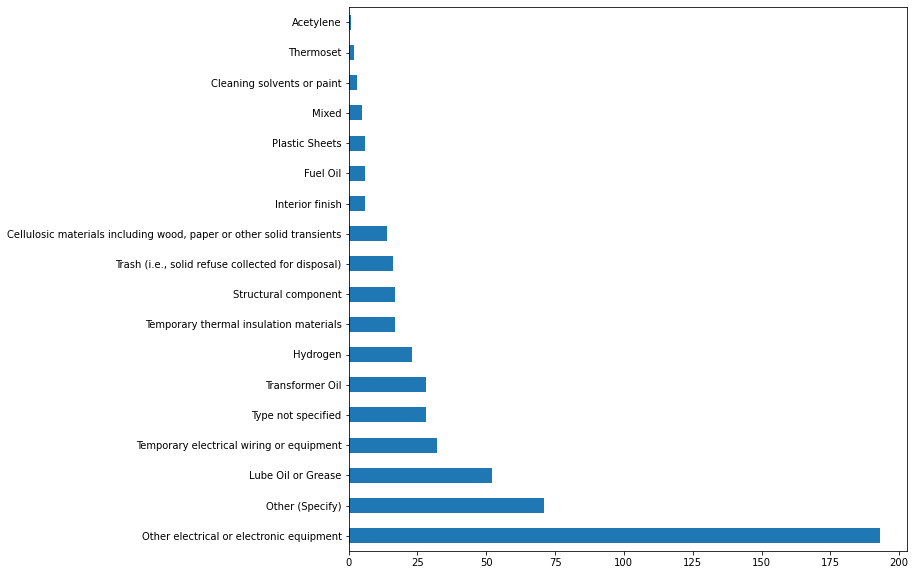

In [195]:
df_em_challenging['Type'].value_counts().plot(kind='barh', figsize = [10, 10])

In [196]:
counts_barh = df_em_challenging['Type'].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts_barh['percentage'] = (counts_barh['counts'] / counts_barh['counts'].sum()) * 100
counts_barh

,unique_values,counts,percentage
0,Other electrical or electronic equipment,193,37.115385
1,Other (Specify),71,13.653846
2,Lube Oil or Grease,52,10.000000
3,Temporary electrical wiring or equipment,32,6.153846
4,Type not specified,28,5.384615
5,Transformer Oil,28,5.384615
6,Hydrogen,23,4.423077
7,Temporary thermal insulation materials,17,3.269231
8,Structural component,17,3.269231
9,"Trash (i.e., solid refuse collected for disposal)",16,3.076923


In [197]:
counts_barh['counts'].sum()

520

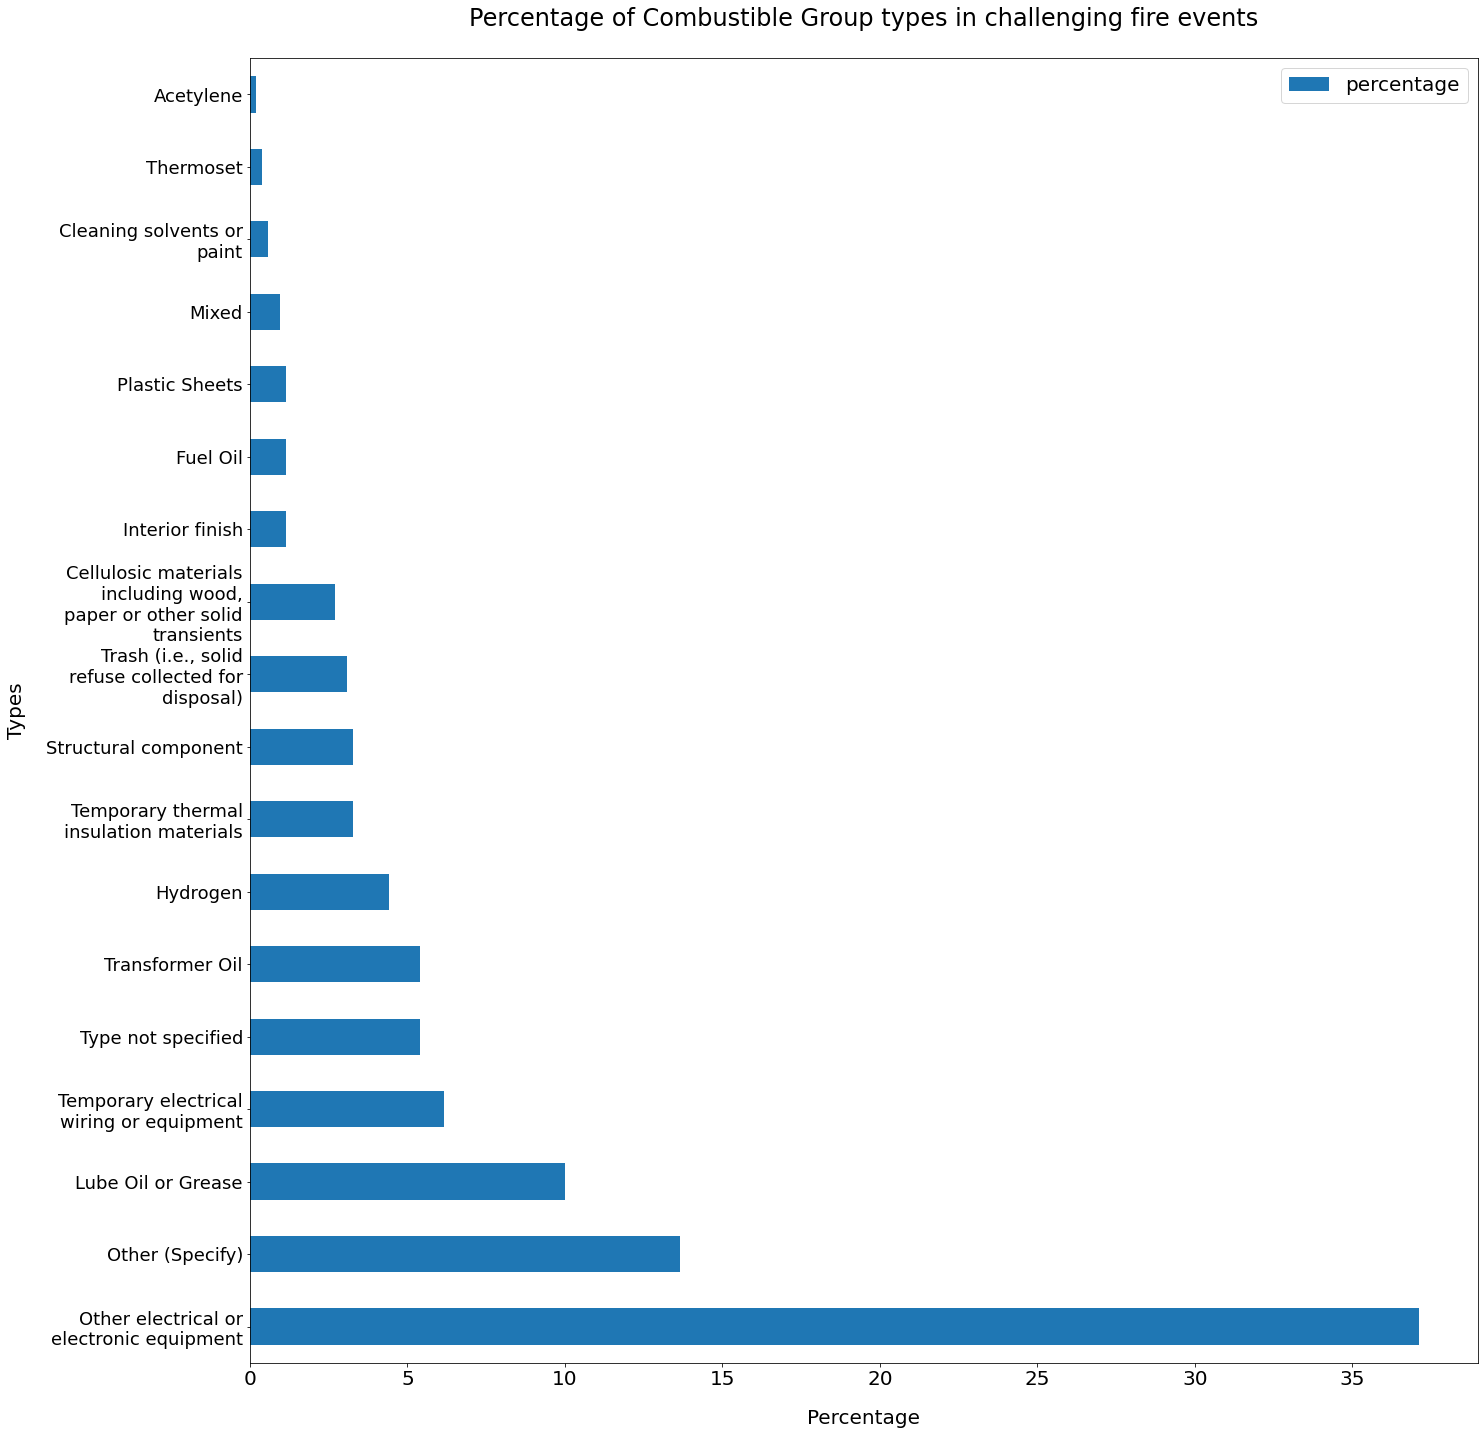

In [204]:
yTickmarks = (counts_barh['unique_values'].unique().tolist())
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

ax = counts_barh.plot(kind='barh', x= 'unique_values', y='percentage', figsize = [22, 24])
ax.set_yticklabels(ylabels, rotation = 0, fontsize = 18)
ax.set_ylabel('Types', fontsize = 20, labelpad = 20)
ax.set_xlabel('Percentage', fontsize = 20, labelpad = 20)
ax.set_title('Percentage of Combustible Group types in challenging fire events', fontsize = 24, x= 0.5, y =1.02)
plt.xticks(fontsize= 20)
ax.legend(fontsize = 20)
plt.savefig(sys_up_dplo + 'Fire Types - Cahellenging - 1990-2014')
plt.show()

In [ ]:
# counts_barh.plot(kind='barh', x= 'unique_values', y='percentage', figsize = [22, 20])

In [205]:
ot_chal = df_em_challenging.groupby('Combustible Group')['Type'].apply(lambda x: x[x == 'Other (Specify)'].count())
ot_chal = ot_chal.reset_index(name='counts')
ot_chal['percentage'] = (ot_chal['counts'] /counts_barh['counts'].sum()) * 100
ot_chal

,Combustible Group,counts,percentage
0,Gas,3,0.576923
1,In_Situ,41,7.884615
2,Insulation,0,0.000000
3,Liquid,7,1.346154
4,Transient,17,3.269231
5,Transient_Liquid,1,0.192308
6,Unknown,1,0.192308


In [259]:
print(df_em_challenging['Combustible Group'].value_counts())
print(df_em_challenging['Type'].value_counts())
print(df_em_challenging['Form'].value_counts())

In_Situ             269
Liquid               94
Transient            92
Insulation           36
Gas                  25
Unknown              11
Transient_Liquid      2
Name: Combustible Group, dtype: int64
Other electrical or electronic equipment                                193
Other (Specify)                                                          71
Lube Oil or Grease                                                       52
Temporary electrical wiring or equipment                                 32
Type not specified                                                       28
Transformer Oil                                                          28
Hydrogen                                                                 23
Temporary thermal insulation materials                                   17
Structural component                                                     17
Trash (i.e., solid refuse collected for disposal)                        16
Cellulosic materials including woo

In [206]:
counts_barf = df_em_challenging['Form'].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts_barf['percentage'] = (counts_barf['counts'] / counts_barf['counts'].sum()) * 100
counts_barf

,unique_values,counts,percentage
0,Unconfined spill,31,20.129870
1,Leak - Oil soaked Insulation,31,20.129870
2,Other (Specify),17,11.038961
3,Single Cable,14,9.090909
4,Contained within component,11,7.142857
5,Jet from a pressurized source,10,6.493506
6,Contained within reservoir,6,3.896104
7,Type not specified,6,3.896104
8,Unknown,5,3.246753
9,Pressurized in a container,5,3.246753


In [255]:
counts_barf = liq_et['Form'].value_counts().rename_axis('unique_values').reset_index(name='counts')

counts_barf['percentage'] = (counts_barf['counts'] / counts_barf['counts'].sum()) * 100
counts_barf

,unique_values,counts,percentage
0,Unconfined spill,31,36.904762
1,Leak - Oil soaked Insulation,30,35.714286
2,Contained within component,10,11.904762
3,Other (Specify),5,5.952381
4,Spill confined by curbs or other physical feat,4,4.761905
5,Contained within reservoir,4,4.761905


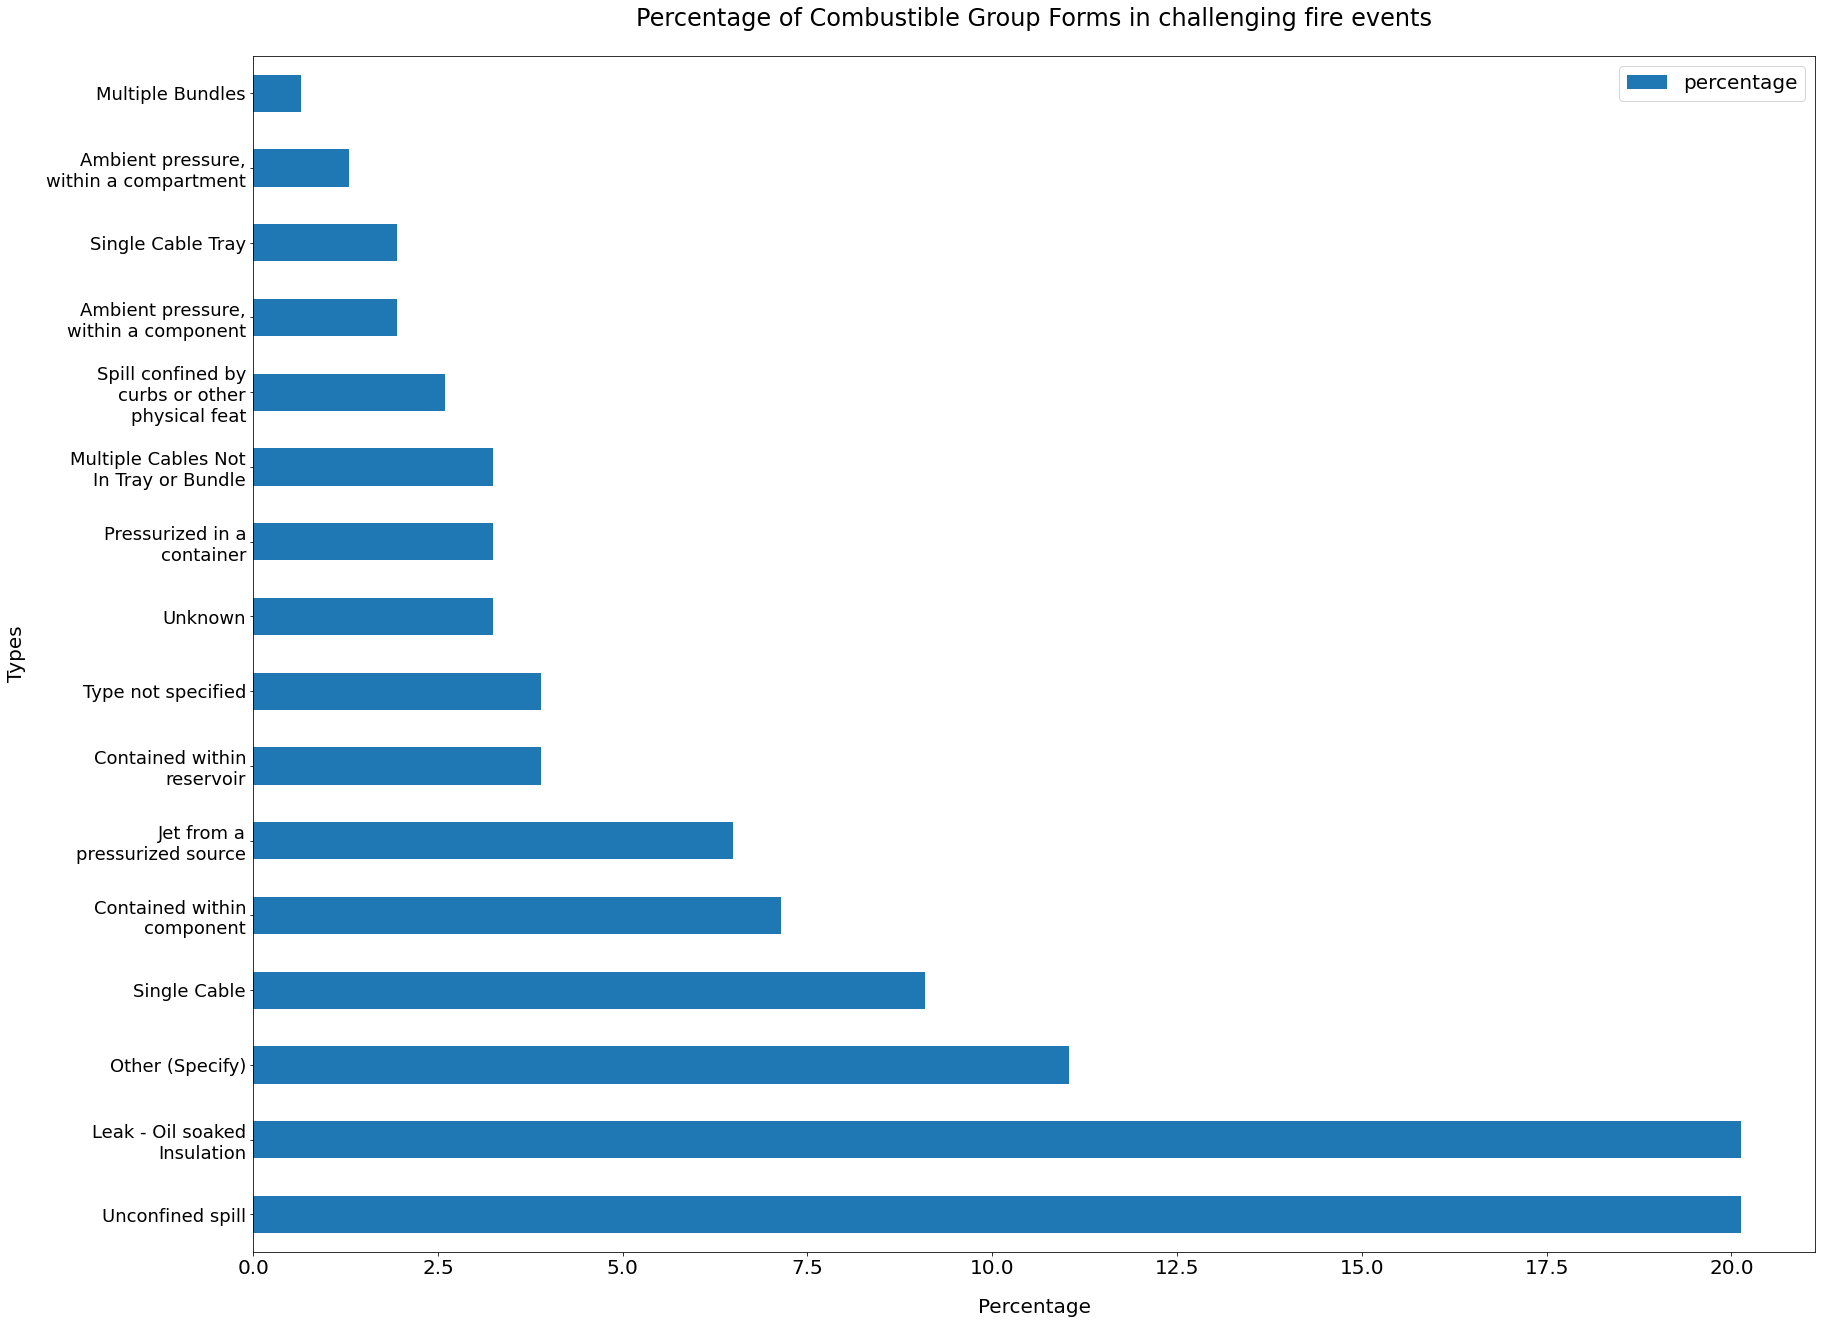

In [209]:
yTickmarks = (counts_barf['unique_values'].unique().tolist())
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

ax = counts_barf.plot(kind='barh', x= 'unique_values', y='percentage', figsize = [28, 22])
ax.set_yticklabels(ylabels, rotation = 0, fontsize = 18)
ax.set_ylabel('Types', fontsize = 20, labelpad = 20)
ax.set_xlabel('Percentage', fontsize = 20, labelpad = 20)
ax.set_title('Percentage of Combustible Group Forms in challenging fire events', fontsize = 24, x= 0.5, y =1.02)
plt.xticks(fontsize= 20)
ax.legend(fontsize = 20)
plt.savefig(sys_up_dplo + 'Combustible Group Form - Cahellenging - 1990-2014')
plt.show()

In [ ]:
ot_chal = df_em_challenging.groupby('Combustible Group')['Form'].apply(lambda x: x[x == 'Other (Specify)'].count())
ot_chal = ot_chal.reset_index(name='counts')
ot_chal['percentage'] = (ot_chal['counts'] /counts_barf['counts'].sum()) * 100
ot_chal

# Plots

In [57]:
def correlation_plot(group1, group2, siz_x, siz_y):
    df_em_gpft = EPRI_up[[group1, group2]].reset_index(drop = True)
    df_em_gpft = pd.DataFrame(df_em_gpft)
    counts = df_em_gpft.groupby([group1, group2])[group2].count()

    x_list = counts.index.get_level_values(0).tolist()
    y_list = counts.index.get_level_values(1).tolist()
    s      = [6*n for n in counts.values]
    s_c    = [n for n in counts.values]


    xTickmarks = sorted(EPRI_up[group2].dropna().unique().tolist())
    yTickmarks = sorted(EPRI_up[group1].dropna().unique().tolist())

    x = [yTickmarks.index(i) for i in x_list]
    y = [xTickmarks.index(i) for i in y_list]
    
    xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
    ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

    matplotlib.rc('font', serif='Helvetica Neue')
    matplotlib.rc('text', usetex='false')
    matplotlib.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize=(siz_x, siz_y), dpi = 100) # for landscape
    axes1 = fig.add_subplot(111)
    title = '%s - %s' %(group1, group2)
    save  = '%s - %s.png' %(group1, group2)

    plt.scatter(x, y, s = s, c = s_c)
    cb = plt.colorbar()
    cb.set_label('Number of Fire Events', fontsize=12)
    
    axes1.tick_params(axis='both', which='major', pad=10)
    axes1.set_xlim((-1, len(yTickmarks)))
    axes1.set_ylim((-1, len(xTickmarks)))
    axes1.set_xticks(xrange(len(yTickmarks)))
    axes1.set_yticks(xrange(len(xTickmarks)))
    axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 12)
    axes1.set_yticklabels(xlabels, fontsize = 12)
    axes1.set_ylabel(group2, fontsize = 14, labelpad = 20)
    axes1.set_xlabel(group1, fontsize = 14, labelpad = 20)
    axes1.legend(prop={'size':5}, ncol=4)
    axes1.xaxis.grid(True)
    axes1.set_title(title, fontsize = 16, x=0.5, y = 1.05)

    plt.show()
    fig.savefig(sys_updated + save, bbox_inches='tight')
    #fig.savefig(save, bbox_inches='tight')

**Fire Events Years**

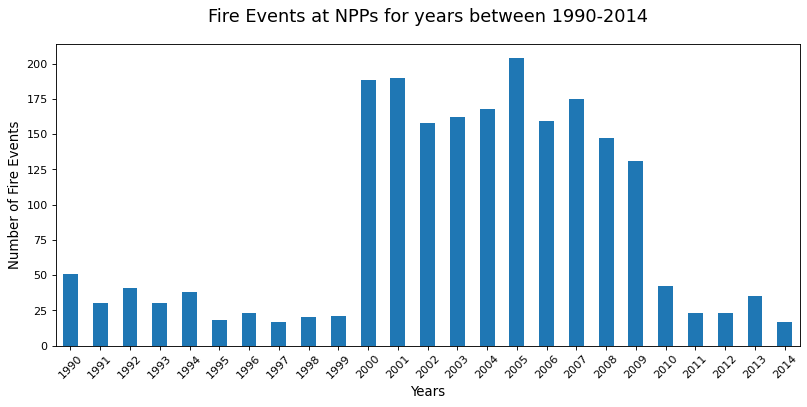

In [71]:
EPRI_up['Event Date_FES'] = pd.to_datetime(EPRI_up['Event Date_FES'])              # Convert to date-time format
EPRI_up['year'] = EPRI_up['Event Date_FES'].dt.year                                # Extract converted years 
df_year = EPRI_up['year'].sort_values(ascending = True)                            # Sort Years
year_labels = sorted(EPRI_up['year'].dropna().unique())
year_labels = np.array(year_labels, dtype=np.float32)

fig_year = plt.figure(figsize=(12, 5), dpi=80)
ax_year  = fig_year.add_subplot(111)
(df_year.value_counts(sort= False, ascending = True).sort_index(ascending = True)).plot(kind ='bar', rot= 45)
ax_year.set_title('Fire Events at NPPs for years between 1990-2014', fontsize=16, y=1.05)
ax_year.set_xlabel('Years', fontsize = 12)
ax_year.set_ylabel('Number of Fire Events', fontsize = 12)
ax_year.set_xticklabels(year_labels.astype(int))
plt.savefig(sys_up_dplo + 'Fire Events 1990-2014')
plt.show()

**Plant Area for Fire Events at NPP for 1990-2014**

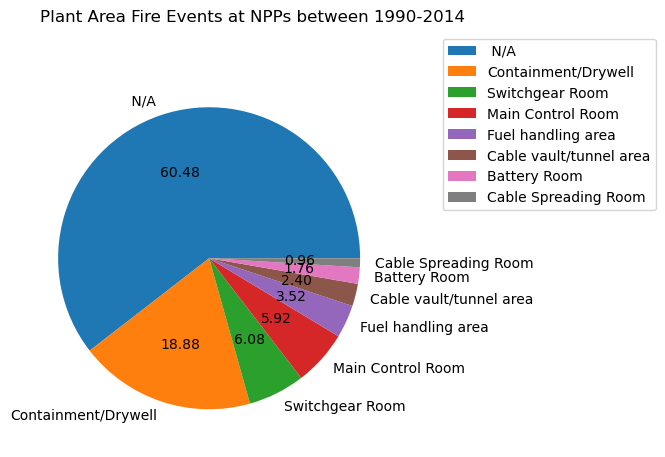

In [150]:
fig_ptar = plt.figure(figsize=(5,5), dpi=100)
ax_ptar = plt.subplot(111)
EPRI_up['Plant Area'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_ptar.suptitle('Plant Area Fire Events at NPPs between 1990-2014', fontsize=12, x = 0.6, y = 1)
ax_ptar.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()
fig_ptar.savefig(sys_up_dplo + "Plant Area.png", bbox_inches='tight')

**NPP Building for Fire Events between (1990-2014)**

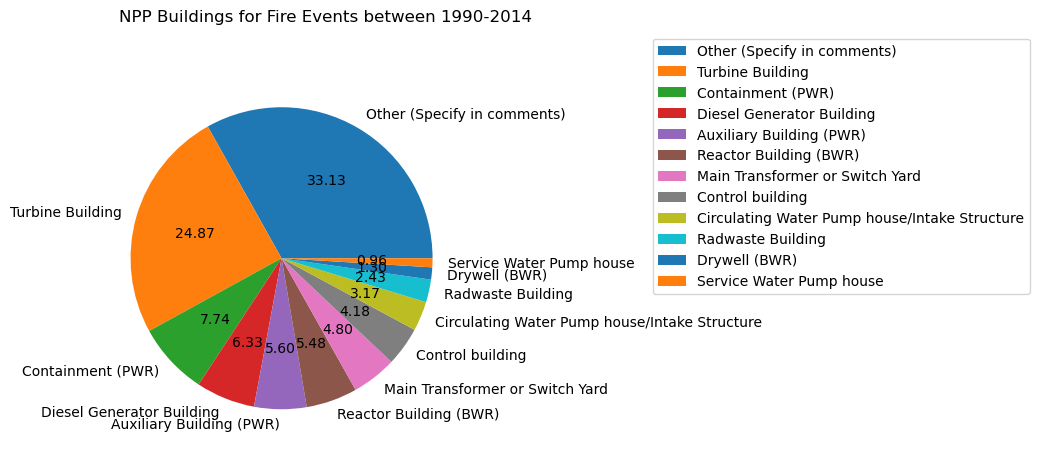

In [152]:
fig_bd = plt.figure(figsize=(5,5), dpi=100)
ax_bd = plt.subplot(111)
EPRI_up['Building'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_bd.suptitle('NPP Buildings for Fire Events between 1990-2014', fontsize=12, x = 0.6, y =1)
ax_bd.legend(bbox_to_anchor=(2.5, 1.1))
plt.show()
fig_bd.savefig(sys_up_dplo + "Building.png", bbox_inches='tight')

**Reactor Mode Prior and After Fire Event Detection**

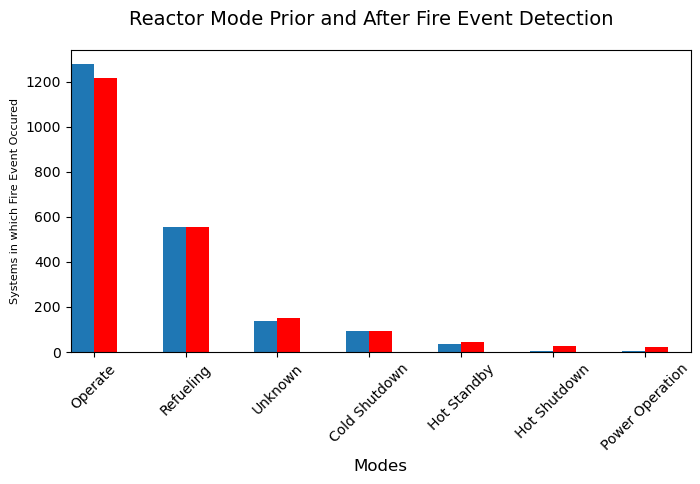

In [165]:
fig_mpa = plt.figure(figsize=(8, 4), dpi=100)
fig_mpa.suptitle('Reactor Mode Prior and After Fire Event Detection', fontsize=14, x = 0.5, y = 0.98)
EPRI_up['Mode Prior'].value_counts(ascending=False).plot(kind='bar', position =1, width = 0.25, rot = 45)
EPRI_up['Mode After'].value_counts(ascending=False).plot(kind='bar', position =0, width = 0.25, color = 'red', rot =45)
plt.ylabel('Systems in which Fire Event Occured', fontsize = 8)
plt.xlabel('Modes', fontsize = 12)
plt.show()
fig_mpa.savefig(sys_up_dplo + "Reactor Mode.png", bbox_inches='tight')

**Primary Combustible Groups for fire events from events between 1990-2014**

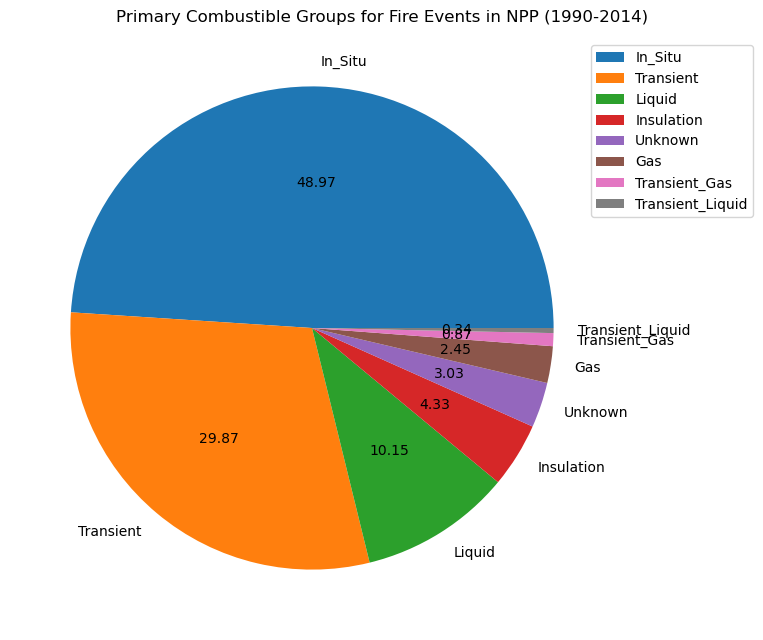

In [172]:
fig_grp = plt.figure(figsize=(8, 8), dpi=100)
ax_grp  = plt.subplot(111)
EPRI_up['Combustible Group'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_grp.suptitle('Primary Combustible Groups for Fire Events in NPP (1990-2014)', fontsize=12, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.98))
plt.show()
fig_grp.savefig(sys_up_dplo + "Primary Combustible Groups.png", bbox_inches='tight')

**Primary Combustible Groups for challenging fire events from events between 1990-2014**

In [182]:
labels_chal = df_em_challenging['Combustible Group'].unique().tolist()
print(labels_chal)

['Gas', 'Transient', 'In_Situ', 'Liquid', 'Insulation', 'Unknown', 'Transient_Liquid', nan]


In [210]:
explode = (0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0)
df_em_challenging['Combustible Group'].value_counts()

In_Situ             269
Liquid               94
Transient            92
Insulation           36
Gas                  25
Unknown              11
Transient_Liquid      2
Name: Combustible Group, dtype: int64

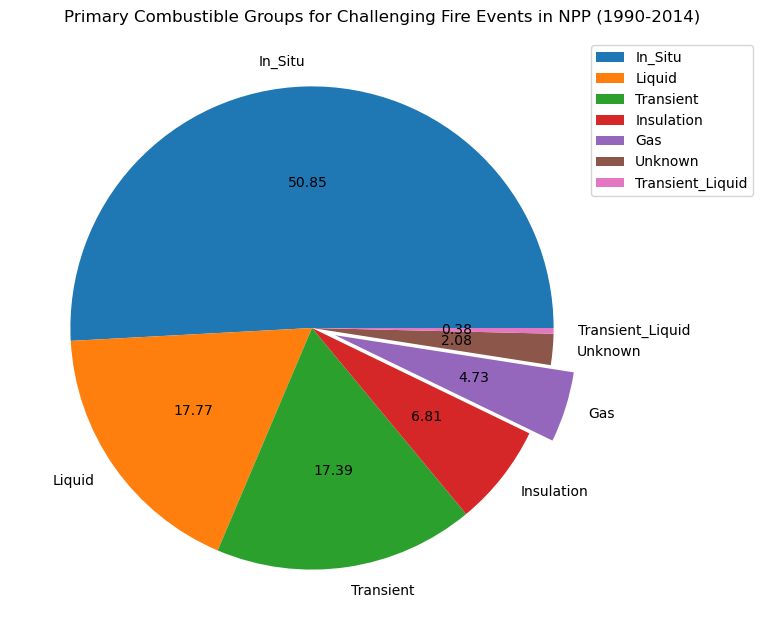

In [194]:
fig_grp = plt.figure(figsize=(8, 8), dpi=100)
ax_grp  = plt.subplot(111)
df_em_challenging['Combustible Group'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='', explode = explode)
#plt.legend(loc='upper left')
fig_grp.suptitle('Primary Combustible Groups for Challenging Fire Events in NPP (1990-2014)', fontsize=12, x = 0.6, y = 0.9)
ax_grp.legend(bbox_to_anchor=(0.95, 0.98))
plt.show()
fig_grp.savefig(sys_up_dplo + "Primary Combustible Groups Challenging.png", bbox_inches='tight')

**Detection Performance and Fire Level Severity**

c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\matplotlib-3.2.1-py3.7-win-amd64.egg\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\urvin salvi\appdata\local\programs\python\python37\lib\site-packages\matplotlib-3.2.1-py3.7-win-amd64.egg\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


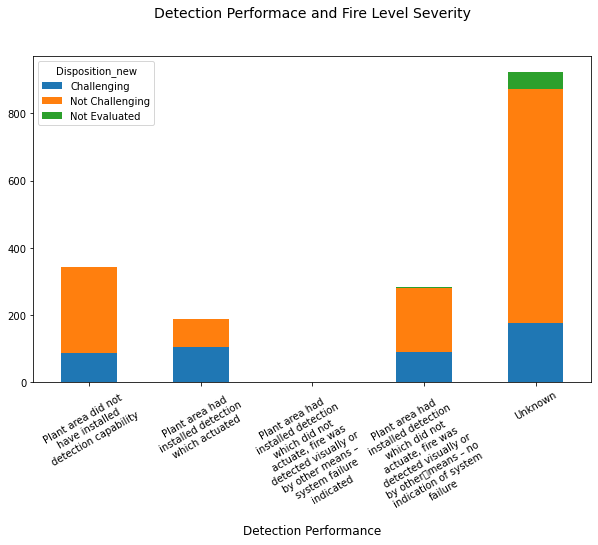

In [72]:
dpfs       = EPRI_up.groupby(['Detection Performance'])['Disposition_new'].value_counts()
ax_dpfs    = dpfs.unstack().plot(kind='bar', stacked = True, figsize = (10,6))
xTickmarks = sorted(EPRI_up['Detection Performance'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpfs.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpfs.set_xlabel('Detection Performance', fontsize = 12)
#ax_dpfs.legend(prop={'size':10}, ncol=4)
ax_dpfs.set_title('Detection Performace and Fire Level Severity', fontsize = 14, x=0.5, y = 1.1)
plt.savefig(sys_up_dplo + 'Detection Performance-Fire Severity')
plt.show()

**Suppression Time and its relation with Disposition**

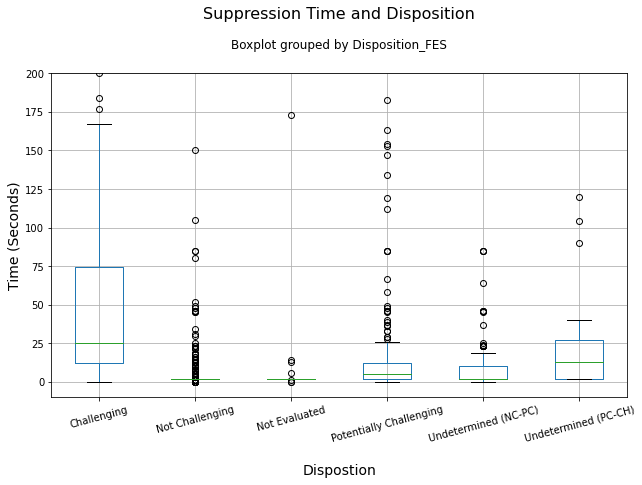

In [179]:
fig, ax_stdp = plt.subplots(figsize=(10, 6))
EPRI_up.boxplot(column=['Suppression Time'], by='Disposition_FES', ax=ax_stdp)
plt.ylim(-10, 200)
plt.ylabel('Time (Seconds)', fontsize = 14)
plt.xticks(rotation = 15)
plt.xlabel('Dispostion', fontsize = 14, labelpad=20)
plt.title('Suppression Time and Disposition', x = 0.5, y = 1.15, fontsize = 16)
plt.savefig(sys_up_dplo + 'Suppression Time-Fire Severity')
plt.show()

**Fire Severity Level in Buildings**

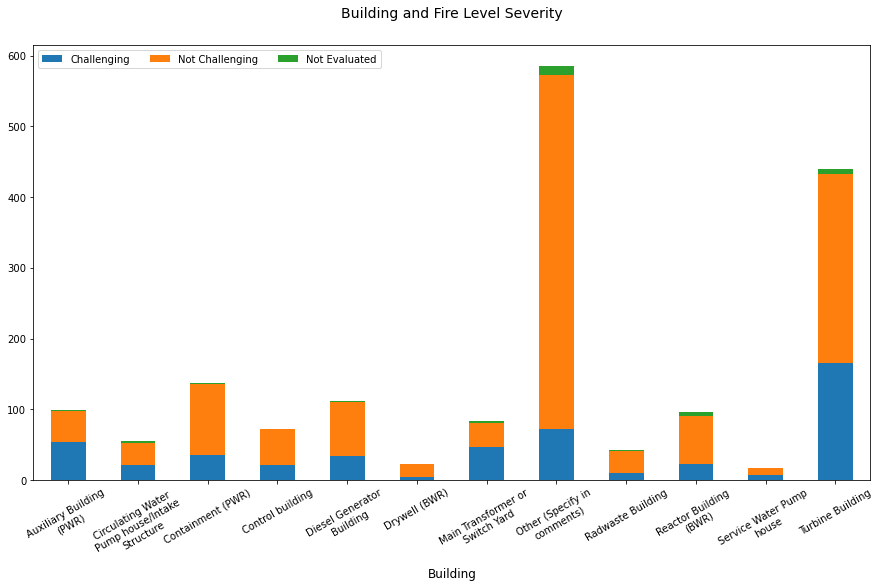

In [74]:
dpbd       = EPRI_up.groupby(['Building'])['Disposition_new'].value_counts()
ax_dpbd    = dpbd.unstack().plot(kind='bar', stacked = True, figsize = (15,8))
xTickmarks = sorted(EPRI_up['Building'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpbd.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpbd.set_xlabel('Building', fontsize = 12)
ax_dpbd.legend(prop={'size':10}, ncol=4)
ax_dpbd.set_title('Building and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Buildings-Fire Severity')
plt.show()

**Combustible Group and Fire Severity**

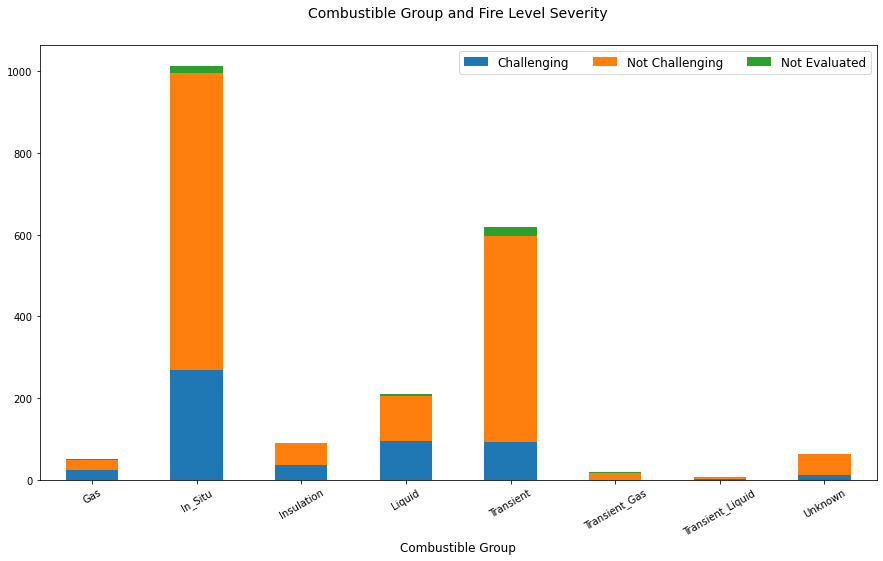

In [75]:
dpcg       = EPRI_up.groupby(['Combustible Group'])['Disposition_new'].value_counts()
ax_dpcg    = dpcg.unstack().plot(kind='bar', stacked = True, figsize = (15,8))
xTickmarks = sorted(EPRI_up['Combustible Group'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpcg.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpcg.set_xlabel('Combustible Group', fontsize = 12)
ax_dpcg.legend(prop={'size':12}, ncol=4)
ax_dpcg.set_title('Combustible Group and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Combustible Groups-Fire Severity')
plt.show()

**Fire Type and Disposition**

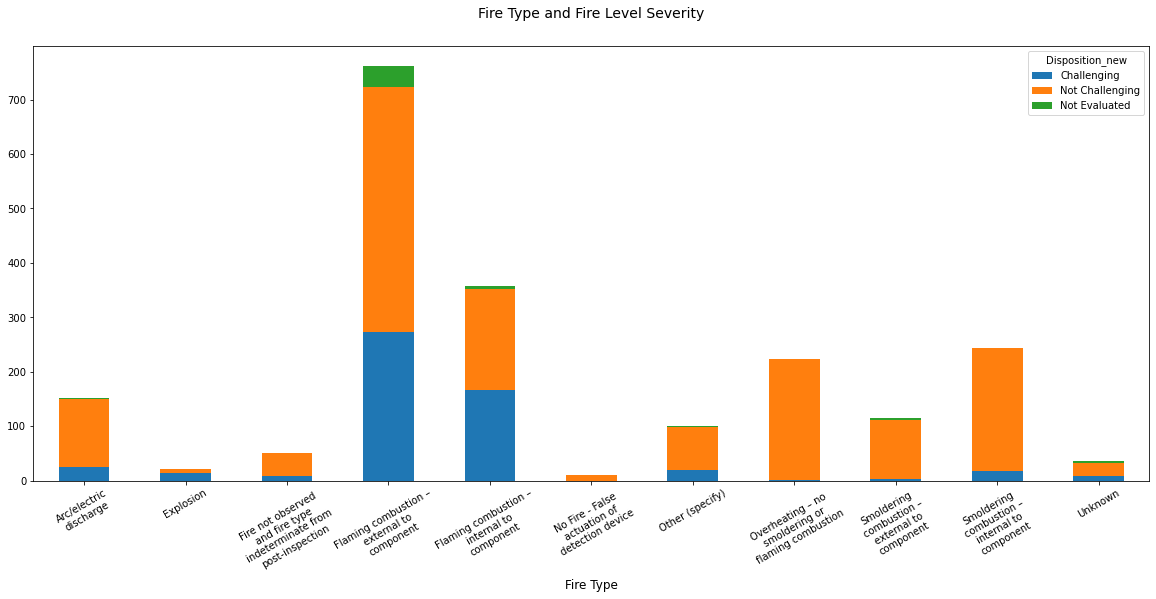

In [76]:
dpft       = EPRI_up.groupby(['Fire Type'])['Disposition_new'].value_counts()
ax_dpft    = dpft.unstack().plot(kind='bar', stacked = True, figsize = (20,8))
xTickmarks = sorted(EPRI_up['Fire Type'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpft.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpft.set_xlabel('Fire Type', fontsize = 12)
ax_dpfs.legend(prop={'size':10}, ncol=4)
ax_dpft.set_title('Fire Type and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Fire Type-Fire Severity')
plt.show()

**Fire Cause and Fire Severity Level**

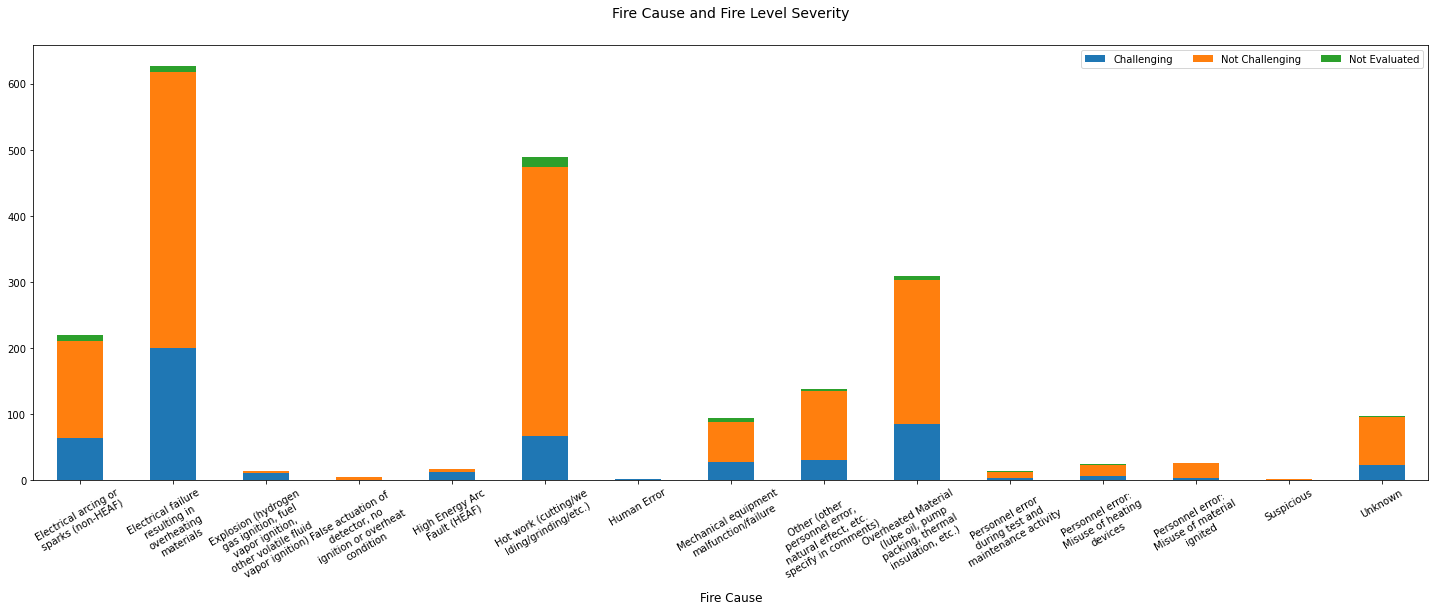

In [77]:
dpfc       = EPRI_up.groupby(['Fire Cause'])['Disposition_new'].value_counts()
ax_dpfc    = dpfc.unstack().plot(kind='bar', stacked = True, figsize = (25,8))
xTickmarks = sorted(EPRI_up['Fire Cause'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpfc.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_dpfc.set_xlabel('Fire Cause', fontsize = 12)
ax_dpfc.legend(prop={'size':10}, ncol=4)
ax_dpfc.set_title('Fire Cause and Fire Level Severity', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Fire Cause-Fire Severity')
plt.show()

# Combustible Group

# In-Situ

No handles with labels found to put in legend.


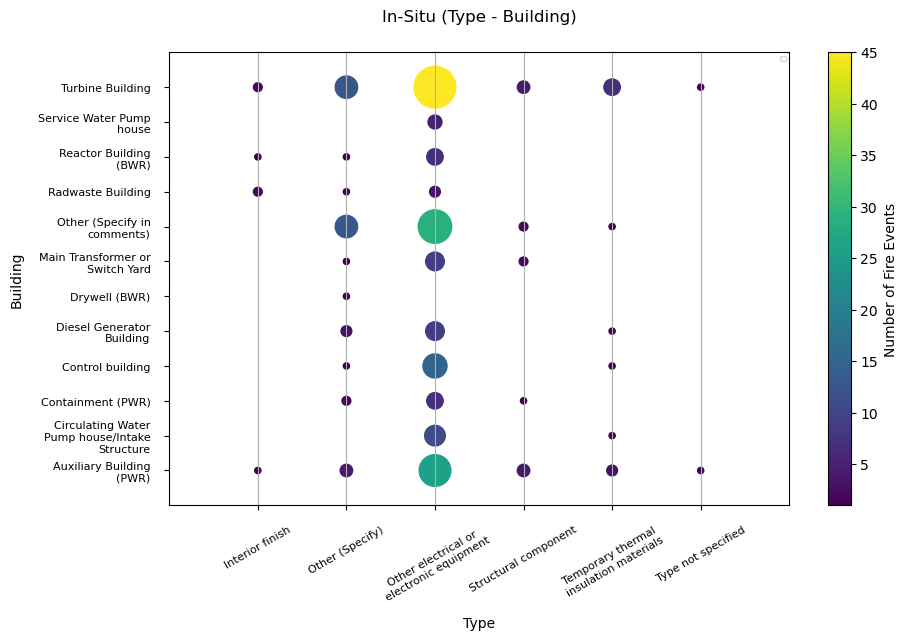

In [84]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']
df_em_gpft = df_em_chal_gas[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [20*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('In-Situ (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'In-Situ (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


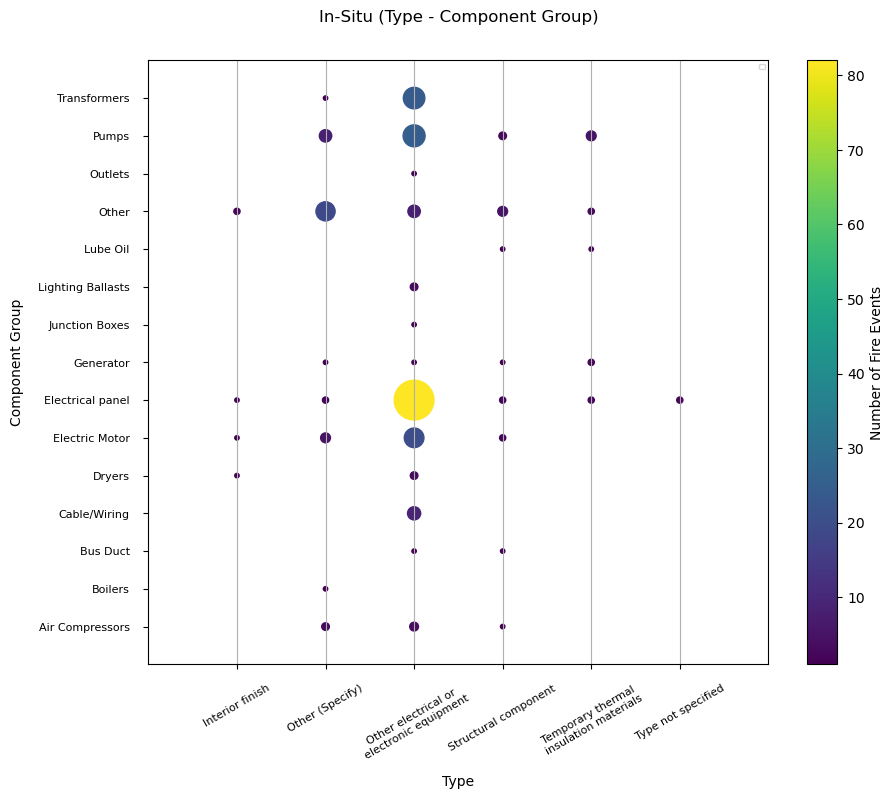

In [91]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']
df_em_gpft = df_em_chal_gas[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [10*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('In-Situ (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'In-Situ (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


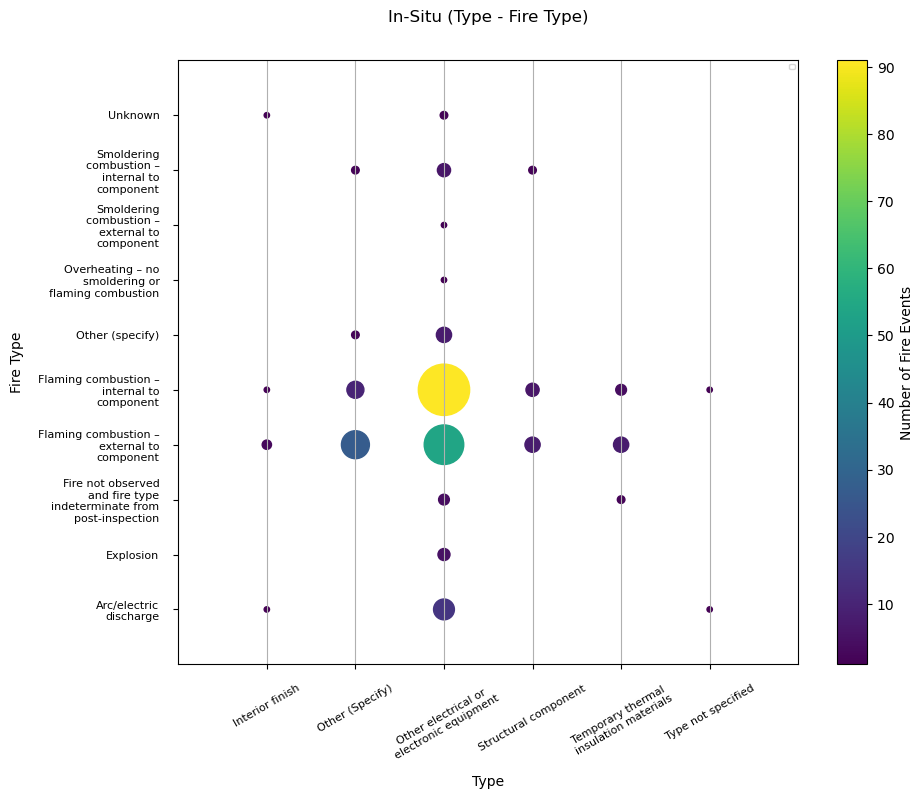

In [94]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'In_Situ']
df_em_gpft = df_em_chal_gas[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [15*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('In-Situ (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'In-Situ (Type - Fire Type)', bbox_inches='tight')

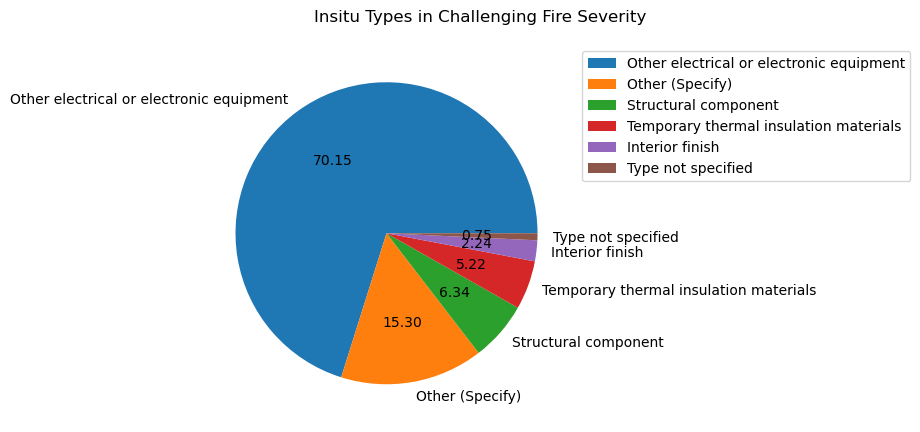

In [218]:
fig_insitu = plt.figure(figsize=(5,5), dpi=100)
ax_insitu = plt.subplot(111)
insitu_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_insitu.suptitle('Insitu Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_insitu.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_insitu.savefig(sys_up_dplo + "Insitu Types pie.png", bbox_inches='tight')

# Liquid

**Building**

No handles with labels found to put in legend.


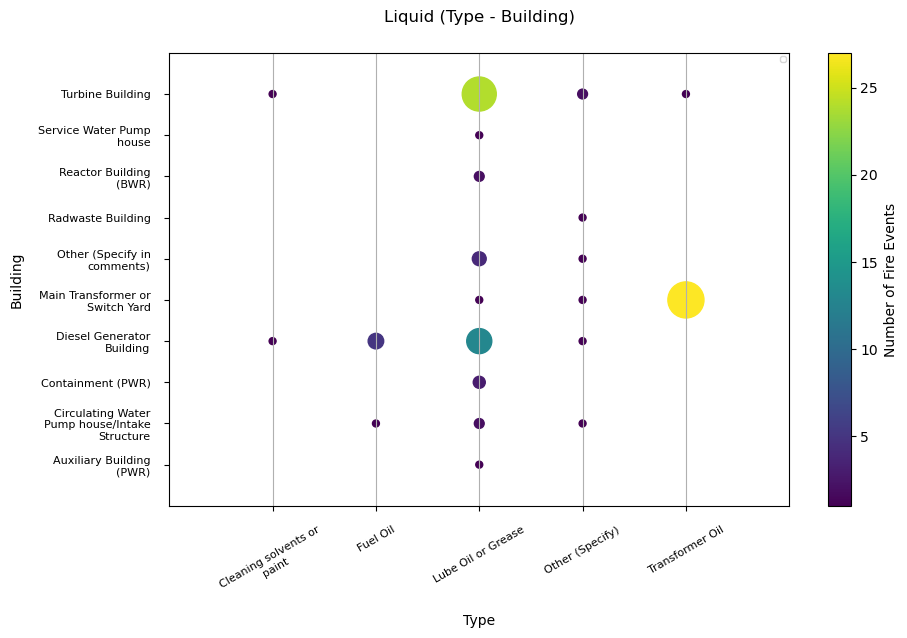

In [99]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


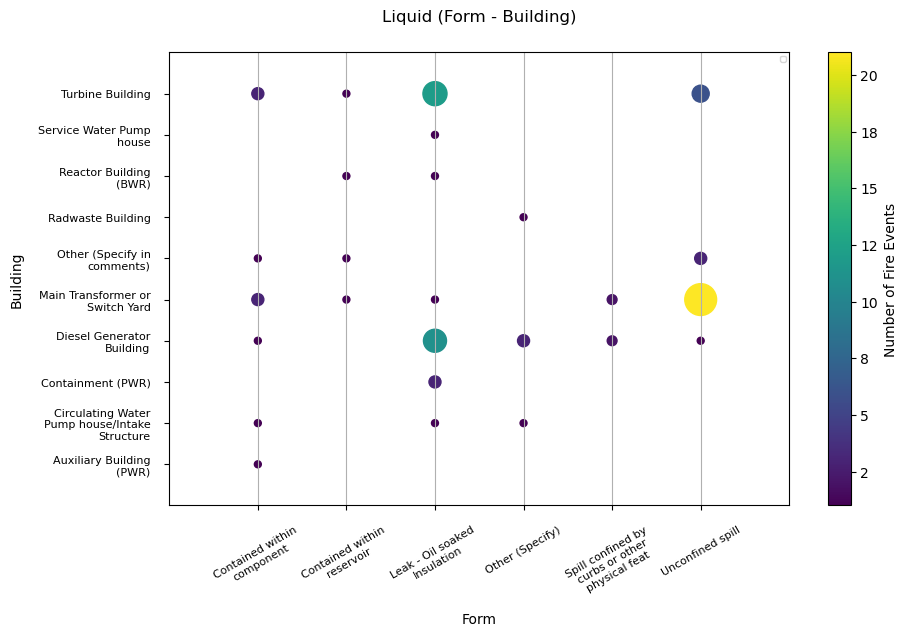

In [101]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Form - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


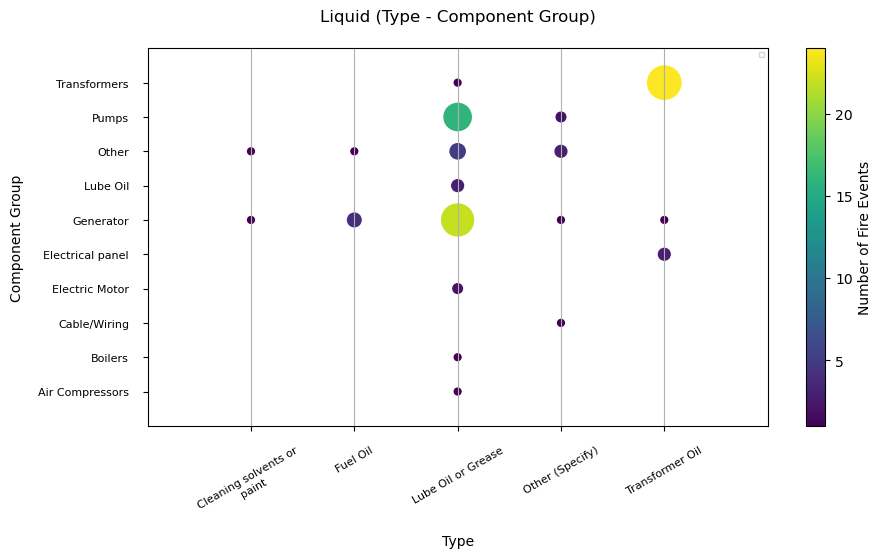

In [105]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [24*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


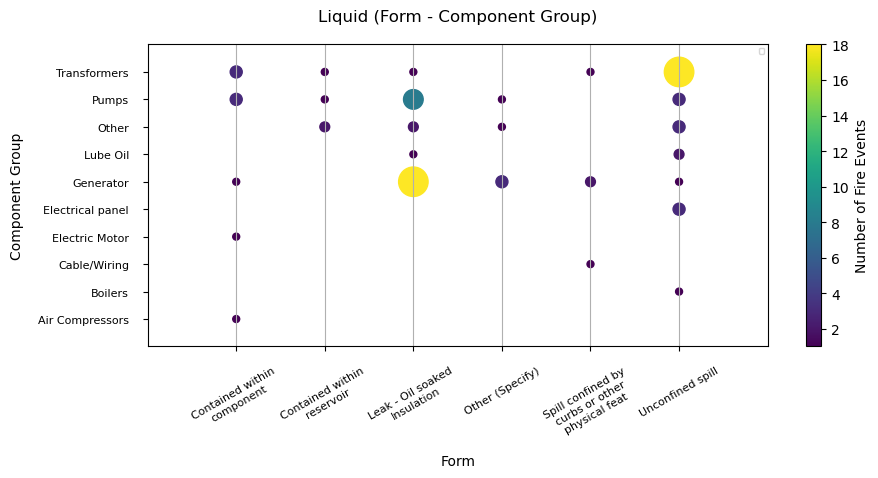

In [106]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Form', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Form - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


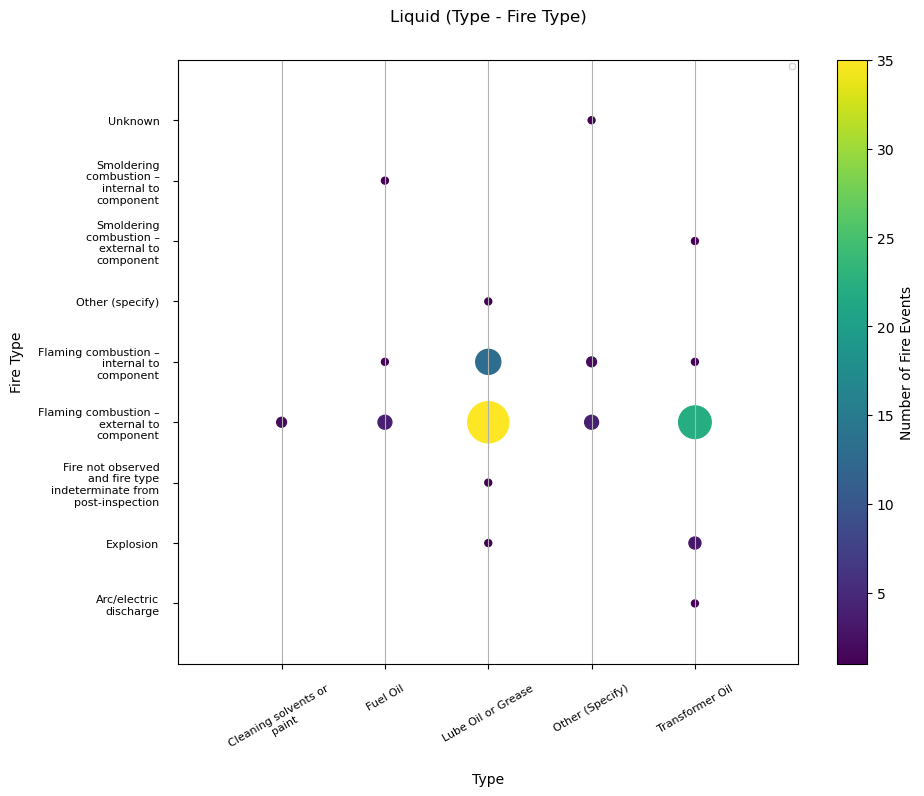

In [108]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Type - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


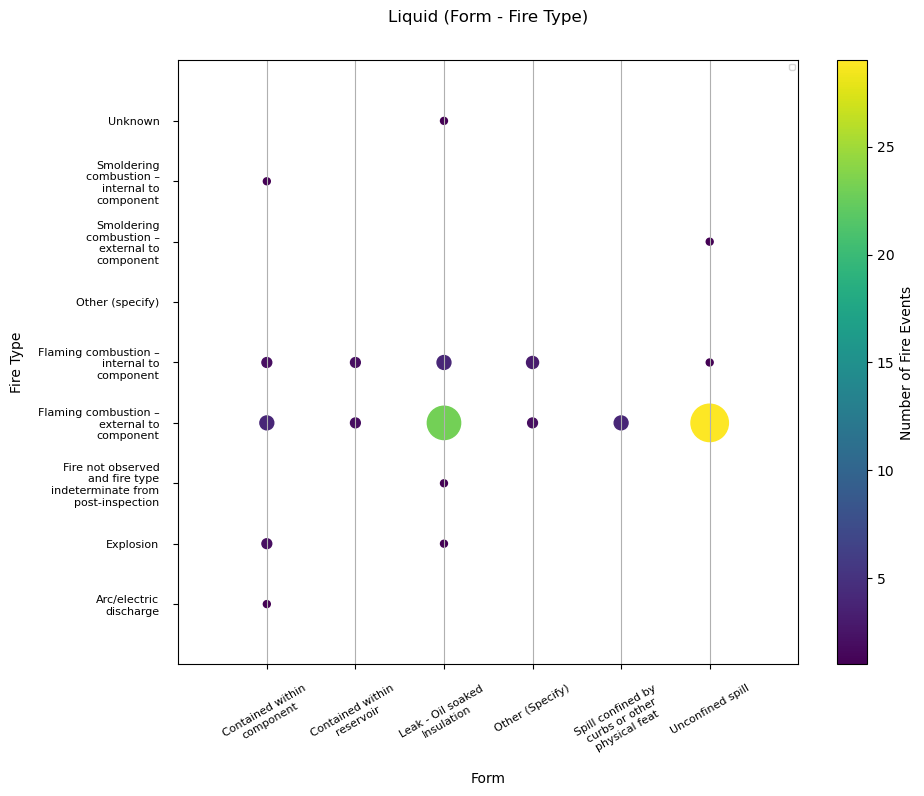

In [110]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_liq = df_em_challenging[df_em_challenging['Combustible Group'] == 'Liquid']
df_em_gpft = df_em_chal_liq[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_liq['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_liq['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 8), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Liquid (Form - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Liquid (Form - Fire Type)', bbox_inches='tight')

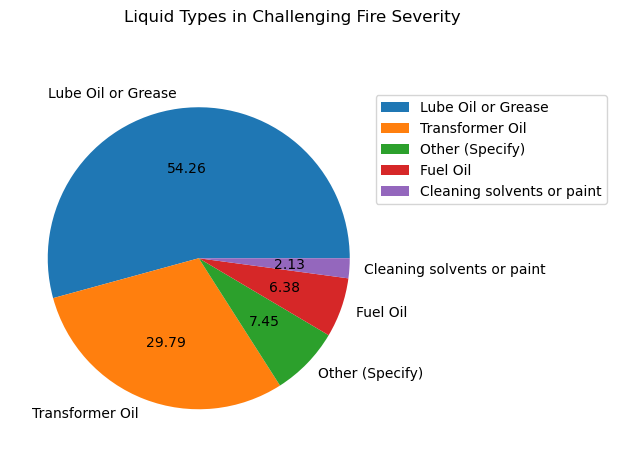

In [220]:
fig_liq = plt.figure(figsize=(5,5), dpi=100)
ax_liq = plt.subplot(111)
liq_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_liq.suptitle('Liquid Types in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_liq.legend(bbox_to_anchor=(0.95, 0.95), fontsize = 10)
plt.show()
fig_liq.savefig(sys_up_dplo + "Liquid Types pie.png", bbox_inches='tight')

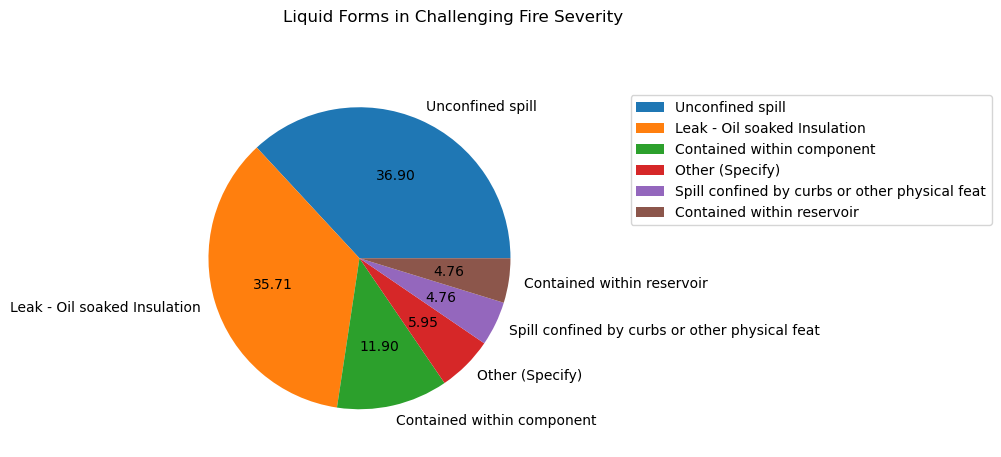

In [225]:
fig_liq = plt.figure(figsize=(5,5), dpi=100)
ax_liq = plt.subplot(111)
liq_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_liq.suptitle('Liquid Forms in Challenging Fire Severity', fontsize=12, x = 0.7, y =1)
ax_liq.legend(bbox_to_anchor=(1.20, 0.95), fontsize = 10)
plt.show()
fig_liq.savefig(sys_up_dplo + "Liquid Forms pie.png", bbox_inches='tight')

# Transient

No handles with labels found to put in legend.


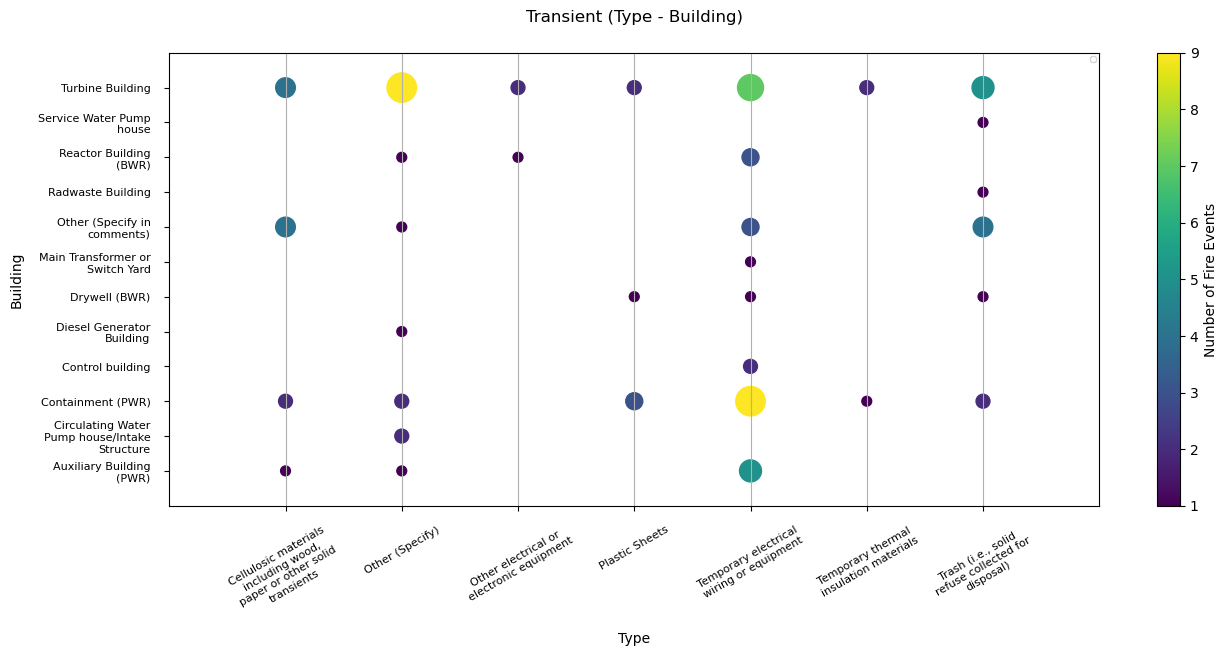

In [111]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_gpft = df_em_chal_trans[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_trans['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_trans['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(15, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Transient (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


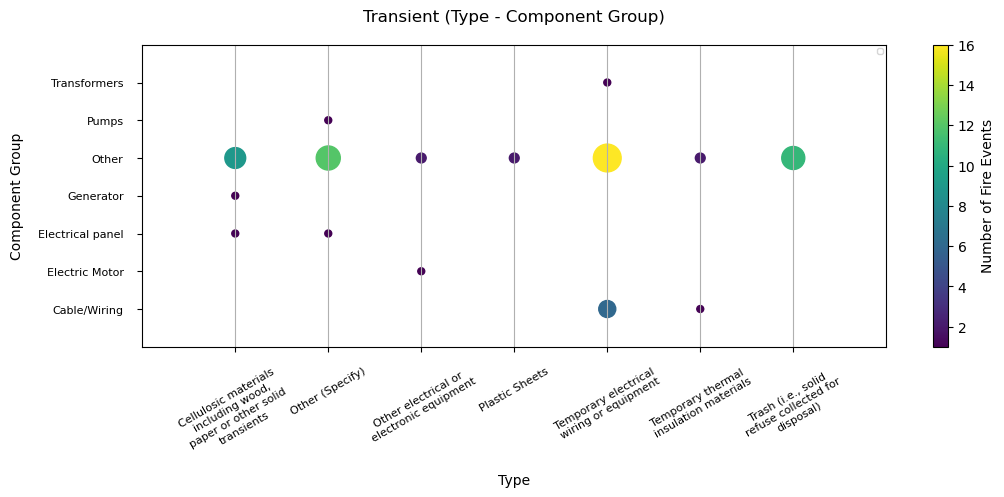

In [113]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_gpft = df_em_chal_trans[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_trans['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_trans['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Transient (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


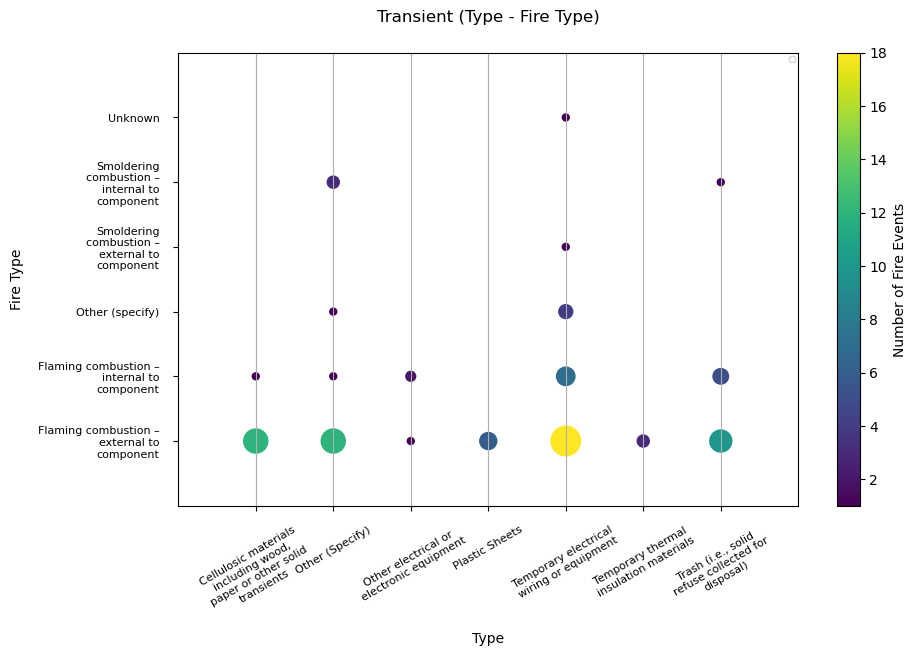

In [114]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Transient']
df_em_gpft = df_em_chal_trans[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_trans['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_trans['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Transient (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Transient (Type - Fire Type)', bbox_inches='tight')

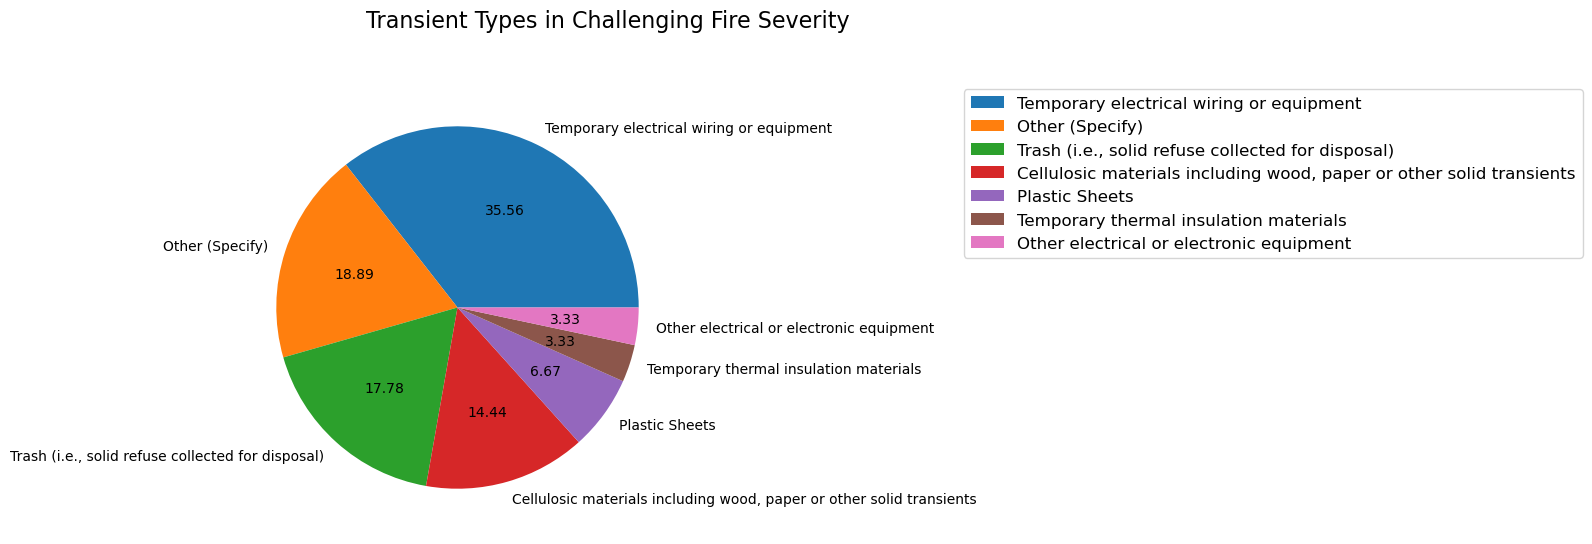

In [231]:
fig_tran = plt.figure(figsize=(8,6), dpi=100)
ax_tran = plt.subplot(111)
trans_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_tran.suptitle('Transient Types in Challenging Fire Severity', fontsize=16, x = 0.7, y =1)
ax_tran.legend(bbox_to_anchor=(1.6, 1), fontsize = 12)
plt.show()
fig_tran.savefig(sys_up_dplo + "Transient Types pie.png", bbox_inches='tight')

# Insulation

No handles with labels found to put in legend.


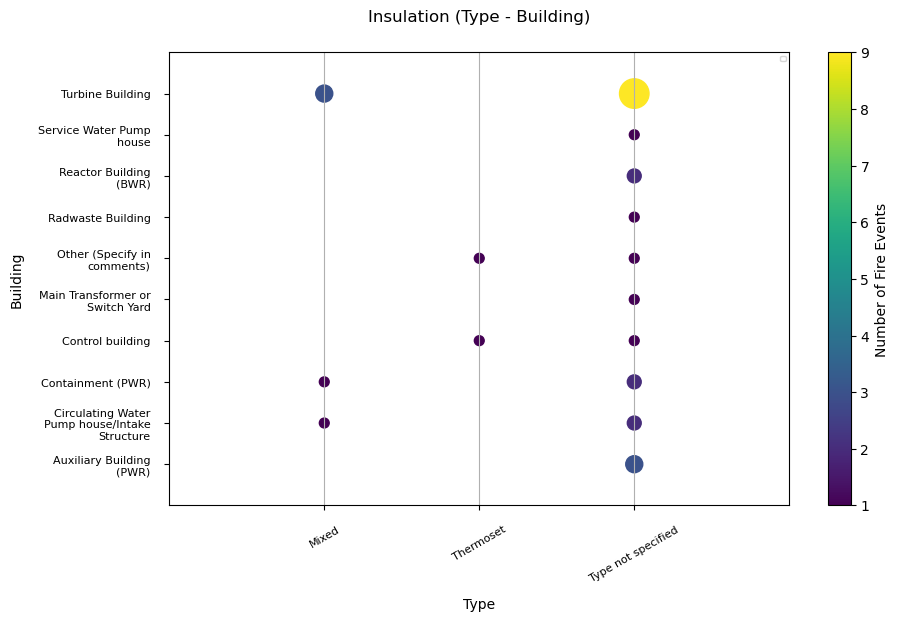

In [117]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = df_em_chal_trans[['Type', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_trans['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_trans['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Type - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Type - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


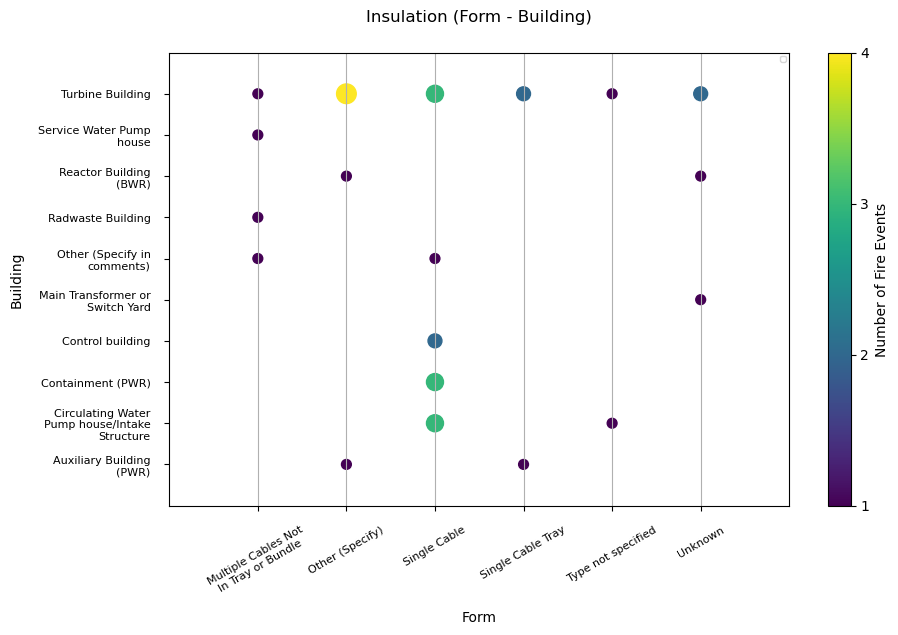

In [119]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_trans = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = df_em_chal_trans[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_trans['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_trans['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f', ticks=[0,1,2,3,4])
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Form - Building)', bbox_inches='tight')

No handles with labels found to put in legend.


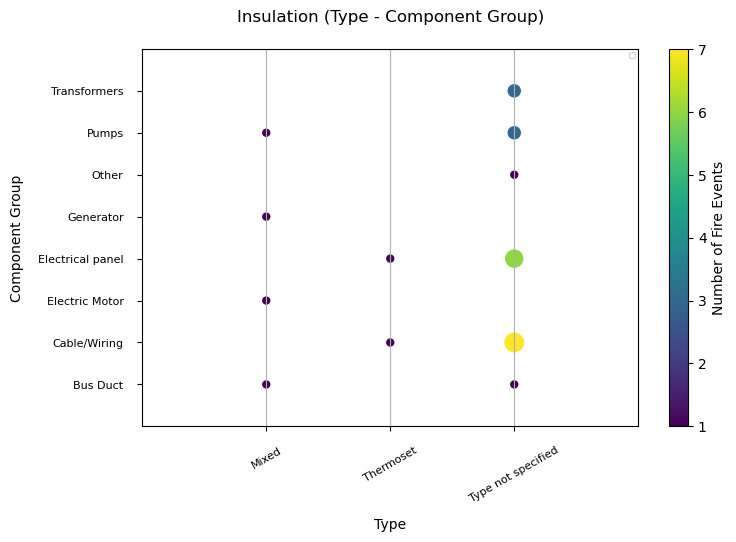

In [122]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = df_em_chal_ins[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [25*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_ins['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_ins['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Type - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Type - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


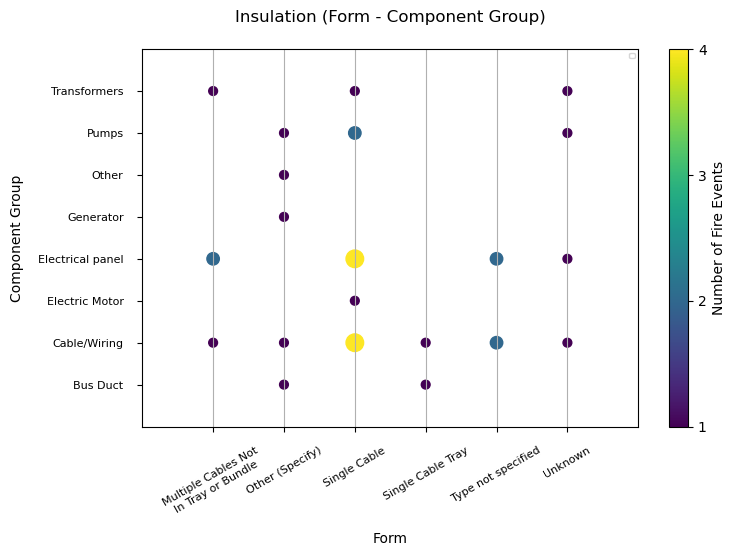

In [127]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = df_em_chal_ins[['Form', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [40*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_ins['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_ins['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(ticks = [0, 1, 2, 3, 4])
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Form - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


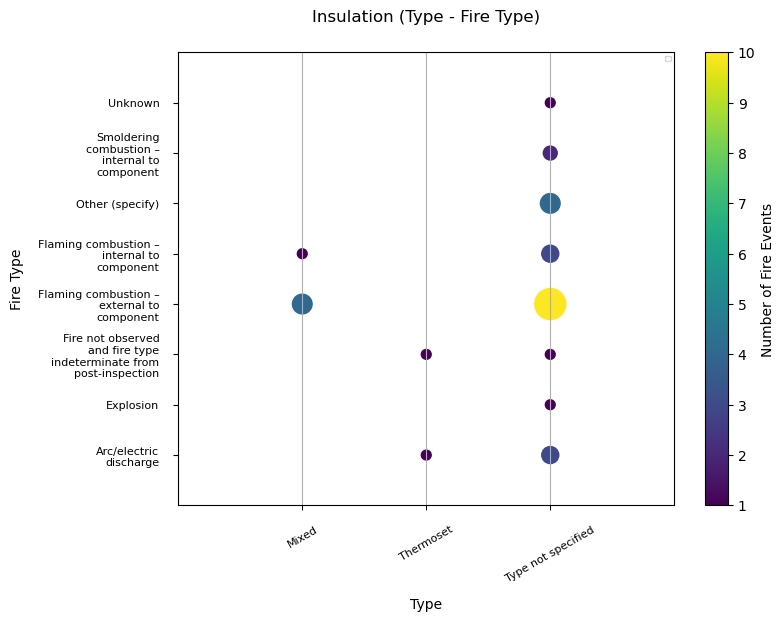

In [136]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = df_em_chal_ins[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_ins['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_ins['Type'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Type', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Type - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Type - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


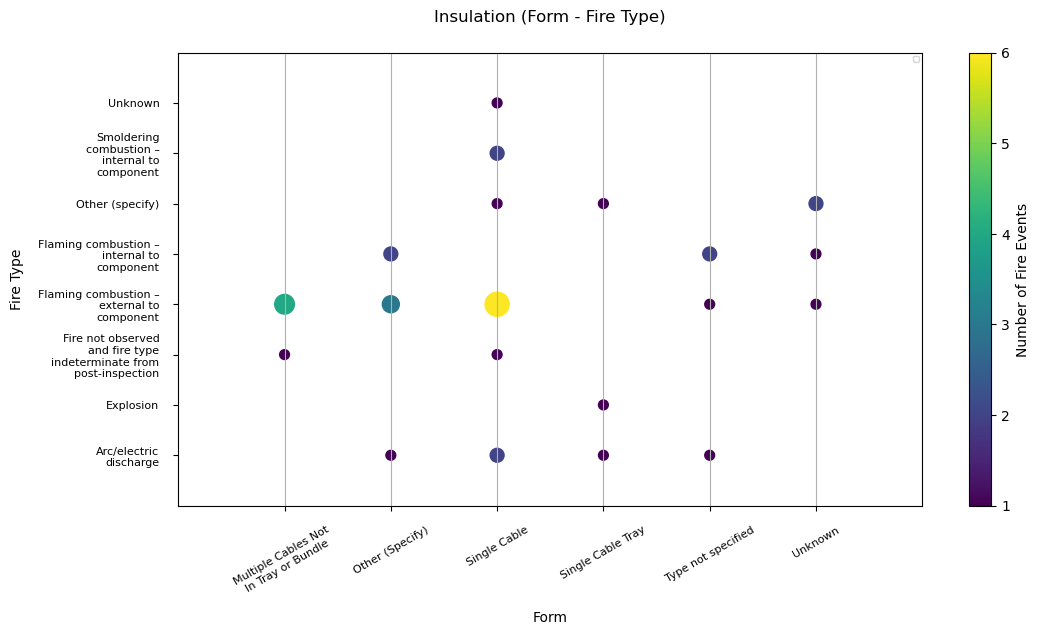

In [143]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_ins = df_em_challenging[df_em_challenging['Combustible Group'] == 'Insulation']
df_em_gpft = df_em_chal_ins[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_ins['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_ins['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 6), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Insulation (Form - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Insulation (Form - Fire Type)', bbox_inches='tight')

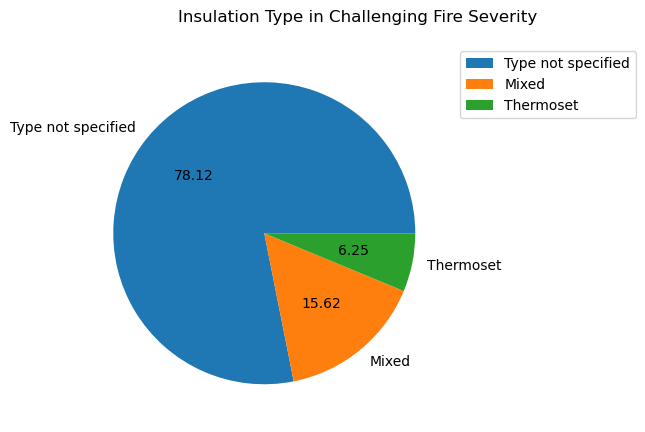

In [234]:
fig_ins = plt.figure(figsize=(5,5), dpi=100)
ax_ins = plt.subplot(111)
ins_et['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_ins.suptitle('Insulation Type in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_ins.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_ins.savefig(sys_up_dplo + "Insulation Type pie.png", bbox_inches='tight')

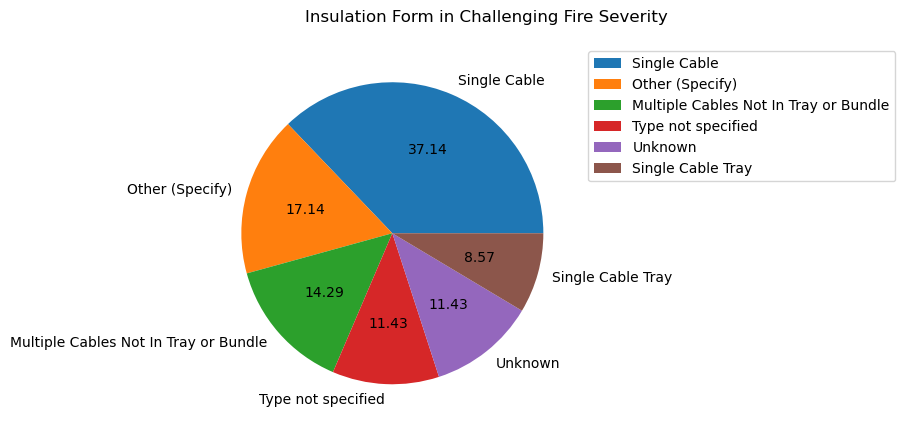

In [233]:
fig_ins = plt.figure(figsize=(5,5), dpi=100)
ax_ins = plt.subplot(111)
ins_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_ins.suptitle('Insulation Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_ins.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()
fig_ins.savefig(sys_up_dplo + "Insulation Form pie.png", bbox_inches='tight')

# Gas

No handles with labels found to put in legend.


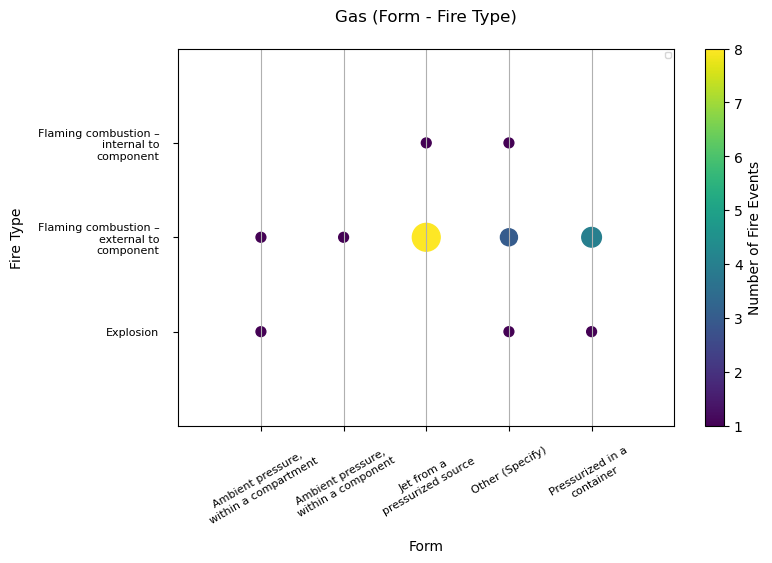

In [147]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = df_em_chal_gas[['Form', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Fire Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(8, 5), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Fire Type)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Form - Fire Type)', bbox_inches='tight')

No handles with labels found to put in legend.


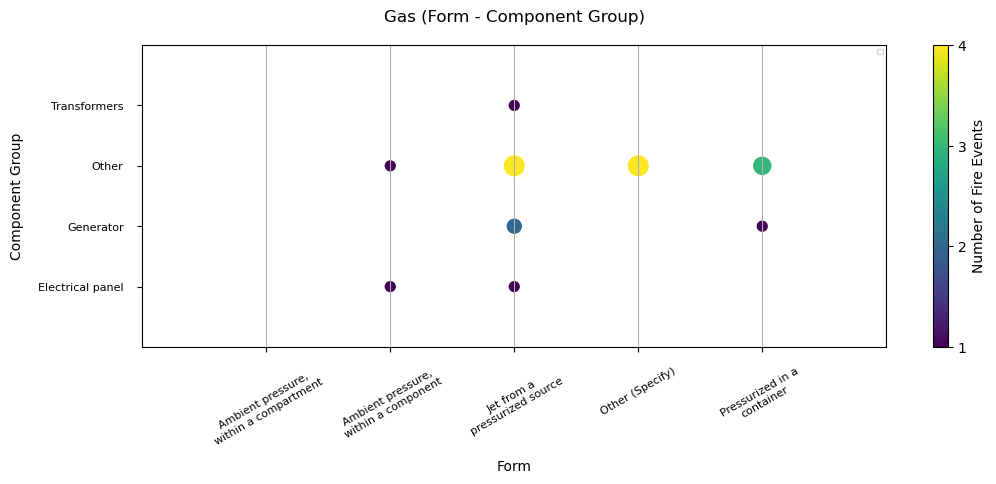

In [146]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = df_em_chal_gas[['Form', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Component Group'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f', ticks = [1, 2, 3, 4])
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Component Group)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Form - Component Group)', bbox_inches='tight')

No handles with labels found to put in legend.


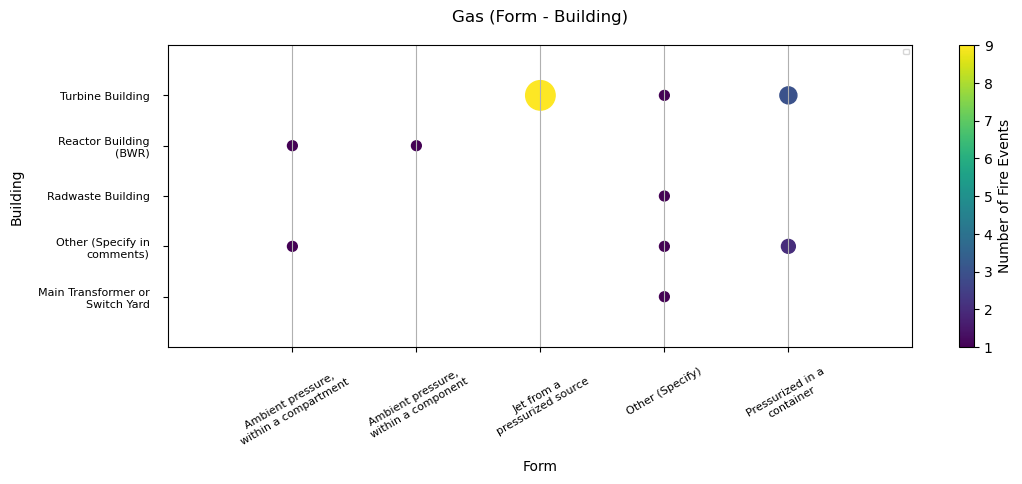

In [144]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = df_em_chal_gas[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(12, 4), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar(format='%.0f')
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10, labelpad=10)
axes1.set_xlabel('Form', fontsize = 10, labelpad=10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_up_dplo + 'Gas (Form - Building)', bbox_inches='tight')

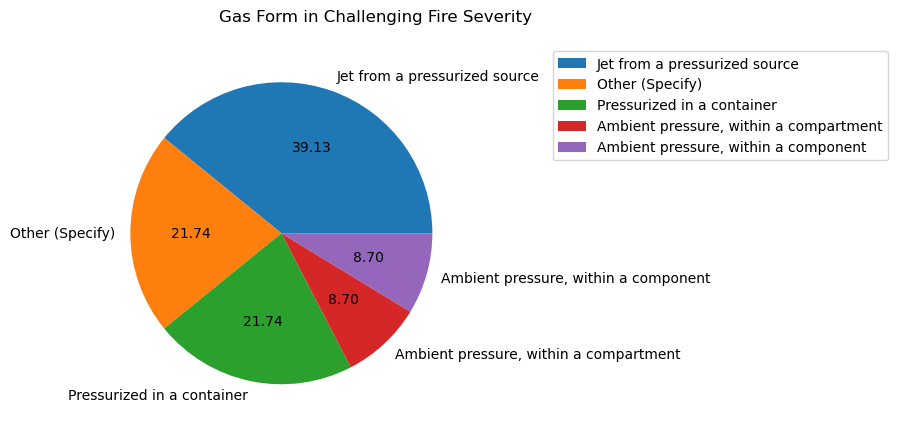

In [236]:
fig_gas = plt.figure(figsize=(5,5), dpi=100)
ax_gas = plt.subplot(111)
gas_et['Form'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
fig_gas.suptitle('Gas Form in Challenging Fire Severity', fontsize=12, x = 0.7, y =0.95)
ax_gas.legend(bbox_to_anchor=(1.2, 1), fontsize = 10)
plt.show()
fig_gas.savefig(sys_up_dplo + "Gas Form pie.png", bbox_inches='tight')

In [252]:
liq_et.groupby(['Type'])['Form'].value_counts()

Type                        Form                                          
Cleaning solvents or paint  Contained within component                         1
                            Unconfined spill                                   1
Fuel Oil                    Leak - Oil soaked Insulation                       2
                            Contained within component                         1
                            Other (Specify)                                    1
                            Unconfined spill                                   1
Lube Oil or Grease          Leak - Oil soaked Insulation                      26
                            Unconfined spill                                   8
                            Contained within component                         5
                            Other (Specify)                                    3
                            Contained within reservoir                         2
                            Spill 

In [269]:
liq_tf_vc = pd.DataFrame(liq_et.groupby(['Form'])['Type'].value_counts())
liq_tf_vc['Percentage'] = 100 * liq_tf_vc['Type']  / 540
liq_tf_vc

Type  \
Form                                           Type                               
Contained within component                     Lube Oil or Grease             5   
                                               Transformer Oil                3   
                                               Cleaning solvents or paint     1   
                                               Fuel Oil                       1   
Contained within reservoir                     Lube Oil or Grease             2   
                                               Other (Specify)                1   
                                               Transformer Oil                1   
Leak - Oil soaked Insulation                   Lube Oil or Grease            26   
                                               Fuel Oil                       2   
                                               Other (Specify)                2   
Other (Specify)                                Lube Oil or Grease             3   
                                               Fuel Oil                       1   
                                               Other (Specify)                1   
Spill confined by curbs or other physical feat Other (Specify)                2   
                                               Lube Oil or Grease             1   
                                               Transformer Oil                1   
Unconfined spill                               Transformer Oil               21   
                                               Lube Oil or Grease             8   
                                               Cleaning solvents or paint     1   
                                               Fuel Oil                       1   

                                                                           Percentage  
Form                                           Type                                    
Contained within component                     Lube Oil or Grease            0.925926  
                                               Transformer Oil               0.555556  
                                               Cleaning solvents or paint    0.185185  
                                               Fuel Oil                      0.185185  
Contained within reservoir                     Lube Oil or Grease            0.370370  
                                               Other (Specify)               0.185185  
                                               Transformer Oil               0.185185  
Leak - Oil soaked Insulation                   Lube Oil or Grease            4.814815  
                                               Fuel Oil                      0.370370  
                                               Other (Specify)               0.370370  
Other (Specify)                                Lube Oil or Grease            0.555556  
                                               Fuel Oil                      0.185185  
                                               Other (Specify)               0.185185  
Spill confined by curbs or other physical feat Other (Specify)               0.370370  
                                               Lube Oil or Grease            0.185185  
                                               Transformer Oil               0.185185  
Unconfined spill                               Transformer Oil               3.888889  
                                               Lube Oil or Grease            1.481481  
                                               Cleaning solvents or paint    0.185185  
                                               Fuel Oil                      0.185185

In [268]:
liq_tf_vc

Type  \
Form                                           Type                               
Contained within component                     Lube Oil or Grease             5   
                                               Transformer Oil                3   
                                               Cleaning solvents or paint     1   
                                               Fuel Oil                       1   
Contained within reservoir                     Lube Oil or Grease             2   
                                               Other (Specify)                1   
                                               Transformer Oil                1   
Leak - Oil soaked Insulation                   Lube Oil or Grease            26   
                                               Fuel Oil                       2   
                                               Other (Specify)                2   
Other (Specify)                                Lube Oil or Grease             3   
                                               Fuel Oil                       1   
                                               Other (Specify)                1   
Spill confined by curbs or other physical feat Other (Specify)                2   
                                               Lube Oil or Grease             1   
                                               Transformer Oil                1   
Unconfined spill                               Transformer Oil               21   
                                               Lube Oil or Grease             8   
                                               Cleaning solvents or paint     1   
                                               Fuel Oil                       1   

                                                                           Percentage  
Form                                           Type                                    
Contained within component                     Lube Oil or Grease            5.952381  
                                               Transformer Oil               3.571429  
                                               Cleaning solvents or paint    1.190476  
                                               Fuel Oil                      1.190476  
Contained within reservoir                     Lube Oil or Grease            2.380952  
                                               Other (Specify)               1.190476  
                                               Transformer Oil               1.190476  
Leak - Oil soaked Insulation                   Lube Oil or Grease           30.952381  
                                               Fuel Oil                      2.380952  
                                               Other (Specify)               2.380952  
Other (Specify)                                Lube Oil or Grease            3.571429  
                                               Fuel Oil                      1.190476  
                                               Other (Specify)               1.190476  
Spill confined by curbs or other physical feat Other (Specify)               2.380952  
                                               Lube Oil or Grease            1.190476  
                                               Transformer Oil               1.190476  
Unconfined spill                               Transformer Oil              25.000000  
                                               Lube Oil or Grease            9.523810  
                                               Cleaning solvents or paint    1.190476  
                                               Fuel Oil                      1.190476

In [270]:
ins_tf_vc = pd.DataFrame(ins_et.groupby(['Form'])['Type'].value_counts())
ins_tf_vc['Percentage'] = 100 * ins_tf_vc['Type']  / 540
#ins_tf_vc.to_excel('ins.xlsx')
ins_tf_vc

Type  Percentage
Form                                  Type                                
Multiple Cables Not In Tray or Bundle Type not specified     5    0.925926
Other (Specify)                       Mixed                  3    0.555556
                                      Type not specified     3    0.555556
Single Cable                          Type not specified     9    1.666667
                                      Mixed                  2    0.370370
                                      Thermoset              2    0.370370
Single Cable Tray                     Type not specified     3    0.555556
Unknown                               Type not specified     4    0.740741

In [271]:
gas_tf_vc = pd.DataFrame(gas_et.groupby(['Form'])['Type'].value_counts())
gas_tf_vc['Percentage'] = 100 * gas_tf_vc['Type']  / 540
#gas_tf_vc.to_excel('gas.xlsx')
gas_tf_vc

Type  Percentage
Form                                   Type                             
Ambient pressure, within a compartment Hydrogen            2    0.370370
Ambient pressure, within a component   Hydrogen            2    0.370370
Jet from a pressurized source          Hydrogen            9    1.666667
Other (Specify)                        Hydrogen            3    0.555556
                                       Other (Specify)     2    0.370370
Pressurized in a container             Hydrogen            4    0.740741
                                       Other (Specify)     1    0.185185

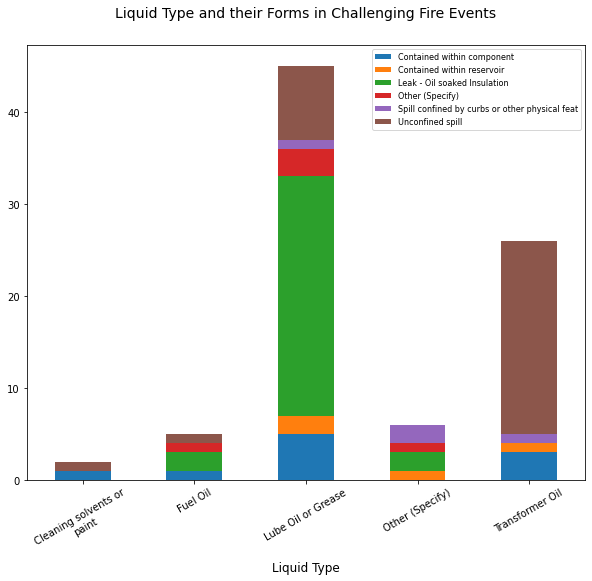

In [245]:
lqtf       = liq_et.groupby(['Type'])['Form'].value_counts()
ax_lqtf    = lqtf.unstack().plot(kind='bar', stacked = True, figsize = (10,8))
xTickmarks = sorted(liq_et['Type'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_lqtf.set_xticklabels(xlabels, rotation = 30, fontsize = 10)
ax_lqtf.set_xlabel('Liquid Type', fontsize = 12)
ax_lqtf.legend(prop={'size':8}, ncol=1)
ax_lqtf.set_title('Liquid Type and their Forms in Challenging Fire Events', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_up_dplo + 'Liquid Type - Form Challenging Fire Events')
plt.show()

**Gas Form and Building - Challenging**

In [ ]:
df_em_challenging = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']
df_em_chal_gas = df_em_challenging[df_em_challenging['Combustible Group'] == 'Gas']
df_em_gpft = df_em_chal_gas[['Form', 'Building']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Form', 'Building'])['Building'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas['Building'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas['Form'].dropna().unique().tolist())

x = [yTickmarks.index(i) for i in x_list]
y = [xTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(7, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(yTickmarks)))
axes1.set_ylim((-1, len(xTickmarks)))
axes1.set_xticks(xrange(len(yTickmarks)))
axes1.set_yticks(xrange(len(xTickmarks)))
axes1.set_xticklabels(ylabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(xlabels, fontsize = 8)
axes1.set_ylabel('Building', fontsize = 10)
axes1.set_xlabel('Form', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Gas (Form - Building)', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_updated + 'Gas (Form - Building)', bbox_inches='tight')

In [ ]:
df_em_chal_gas_turbine = df_em_chal_gas[df_em_chal_gas['Building'] == 'Turbine Building']

In [ ]:
df_em_gpft = df_em_chal_gas_turbine[['Type', 'Fire Type']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Fire Type'])['Fire Type'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas_turbine['Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas_turbine['Fire Type'].dropna().unique().tolist())

x = [xTickmarks.index(i) for i in x_list]
y = [yTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(5, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=12)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(xTickmarks)))
axes1.set_ylim((-1, len(yTickmarks)))
axes1.set_xticks(xrange(len(xTickmarks)))
axes1.set_yticks(xrange(len(yTickmarks)))
axes1.set_xticklabels(xlabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(ylabels, fontsize = 8)
axes1.set_ylabel('Fire Type', fontsize = 10)
axes1.set_xlabel('Gas Type', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Turbine Building  Gas Type - Fire Type', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_updated + 'Turbine Building -  Gas Type - Fire Type', bbox_inches='tight')

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_gas_turbine[['Type', 'Form']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Form'])['Form'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas_turbine['Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas_turbine['Form'].dropna().unique().tolist())

x = [xTickmarks.index(i) for i in x_list]
y = [yTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(5, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(xTickmarks)))
axes1.set_ylim((-1, len(yTickmarks)))
axes1.set_xticks(xrange(len(xTickmarks)))
axes1.set_yticks(xrange(len(yTickmarks)))
axes1.set_xticklabels(xlabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(ylabels, fontsize = 8)
axes1.set_ylabel('Form', fontsize = 10)
axes1.set_xlabel('Type', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Turbine Building - Gas Form - Fire Type', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_updated + 'Turbine Building Gas Type - Gas Form', bbox_inches='tight')

In [ ]:
# df_em_challenging[df_em_challenging['Group'] == 'In_Situ']
# df_em_gpft = df_epri_merge[[group1, group2]].reset_index(drop = True)
# df_em_gpft = pd.DataFrame(df_em_gpft)
# counts = df_em_gpft.groupby([group1, group2])[group2].count()

df_em_gpft = df_em_chal_gas_turbine[['Type', 'Component Group']].reset_index(drop = True)
df_em_gpft = pd.DataFrame(df_em_gpft)
counts = df_em_gpft.groupby(['Type', 'Component Group'])['Component Group'].count()

x_list = counts.index.get_level_values(0).tolist()
y_list = counts.index.get_level_values(1).tolist()
s      = [50*n for n in counts.values]
s_c    = [n for n in counts.values]


xTickmarks = sorted(df_em_chal_gas_turbine['Type'].dropna().unique().tolist())
yTickmarks = sorted(df_em_chal_gas_turbine['Component Group'].dropna().unique().tolist())

x = [xTickmarks.index(i) for i in x_list]
y = [yTickmarks.index(i) for i in y_list]
    
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ylabels = [ '\n'.join(wrap(l, 20)) for l in yTickmarks] 

matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(5, 3), dpi = 100) # for landscape
axes1 = fig.add_subplot(111)
# title = '%s - %s' %('Form', 'Type')
# save  = '%s - %s.png' %('Form', 'Type')

plt.scatter(x, y, s = s, c = s_c)
cb = plt.colorbar()
cb.set_label('Number of Fire Events', fontsize=10)
    
axes1.tick_params(axis='both', which='major', pad=10)
axes1.set_xlim((-1, len(xTickmarks)))
axes1.set_ylim((-1, len(yTickmarks)))
axes1.set_xticks(xrange(len(xTickmarks)))
axes1.set_yticks(xrange(len(yTickmarks)))
axes1.set_xticklabels(xlabels, rotation = 30, fontsize = 8)
axes1.set_yticklabels(ylabels, fontsize = 8)
axes1.set_ylabel('Component Group', fontsize = 10)
axes1.set_xlabel('Type', fontsize = 10)
axes1.legend(prop={'size':5}, ncol=4)
axes1.xaxis.grid(True)
axes1.set_title('Turbine Building - Gas Type - Component Group', fontsize = 12, x=0.5, y = 1.05)

plt.show()
fig.savefig(sys_updated + 'Turbine Building Gas Type - Component Group', bbox_inches='tight')

**Primary Combustible Groups**

In [ ]:
fig_grp = plt.figure(figsize=(20, 12), dpi=100)
ax_grp  = plt.subplot(111)
EPRI_up['Combustible Group'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_grp.suptitle('Primary Combustible Groups for Fire Events in NPP (1990-2014)', fontsize=10, x = 0.55, y = 0.9)
ax_grp.legend(fontsize = 10, bbox_to_anchor=(0.9, 0.98))
plt.show()
fig_grp.savefig(sys_updated + "Primary Combustible Groups.png", bbox_inches='tight')

**Primary Combustible Group - Challenging**

In [ ]:
fig_grc = plt.figure(figsize=(8, 6), dpi=100)
ax_grc  = plt.subplot(111)
df_em_challenging['Combustible Group'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_grc.suptitle('Primary Combustible Groups for Challenging Fire Events (1990-2014)', fontsize=12, x = 0.55, y = 0.95)
ax_grc.legend(fontsize = 10, bbox_to_anchor=(0.9, 0.98))
plt.show()
fig_grc.savefig(sys_updated + "Primary Combustible Groups Challenging.png", bbox_inches='tight')

In [ ]:
df_em_challenging['Combustible Group'].value_counts()

In [ ]:
fig_grc = plt.figure(figsize=(8, 6), dpi=100)
ax_grc  = plt.subplot(111)
df_em_challenging['Type'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label= '')
#plt.legend(loc='upper left')
fig_grc.suptitle('Primary Combustible Type for Challenging Fire Events (1990-2014)', fontsize=12, x = 0.55, y = 0.95)
ax_grc.legend(fontsize = 10, bbox_to_anchor=(0.9, 0.98))
plt.show()
fig_grc.savefig(sys_updated + "Primary Combustible Type Challenging.png", bbox_inches='tight')

In [ ]:
df_em_challenging['Type'].value_counts().sum()

**NPP Buildings**

In [ ]:
fig_bd = plt.figure(figsize=(5,5), dpi=100)
ax_bd = plt.subplot(111)
EPRI_up['Building'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_bd.suptitle('NPP Buildings for Fire Events between 1990-2009', fontsize=12, x = 0.65, y = 1)
ax_bd.legend(fontsize = 8, bbox_to_anchor=(1.25, 1.05))
plt.show()
fig_bd.savefig(sys_updated + "Building.png", bbox_inches='tight')

**Dispostion new**

In [ ]:
fig_disp = plt.figure(figsize=(5,5), dpi=100)
ax_disp = plt.subplot(111)
EPRI_up['Disposition_new'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_disp.suptitle('Revised Disposition of Fire Events at NPPs between 1990-2009', fontsize=10, x =0.6 )
ax_disp.legend(bbox_to_anchor=(1, 1))
plt.show()
fig_disp.savefig(sys_updated + "Revised Disposition of Fire Events at NPPs between 1990-2009.png", bbox_inches='tight')

**Combustible Group**

In [ ]:
correlation_plot('Combustible Group', 'Building', 18, 12)

**Turbine Building - Component Group - Fire Type**

In [ ]:
dpcg_gt       = df_em_chal_gas_turbine.groupby(['Component Group'])['Fire Type'].value_counts()
ax_dpcg_gt    = dpcg_gt.unstack().plot(kind='bar', stacked = True, figsize = (10,6))
xTickmarks = sorted(df_em_chal_gas_turbine['Component Group'].dropna().unique().tolist())  
xlabels = [ '\n'.join(wrap(l, 20)) for l in xTickmarks]
ax_dpcg_gt.set_xticklabels(xlabels, rotation = 0, fontsize = 10)
ax_dpcg_gt.set_xlabel('Fire Cause', fontsize = 12)
ax_dpcg_gt.legend(prop={'size':10}, ncol=1, loc = 'upper left')
ax_dpcg_gt.set_title('Turbine Building - Gas, Component Group -  Fire Type', fontsize = 14, x=0.5, y = 1.05)
plt.savefig(sys_updated + 'Turbine Building Gas Component Group Fire Type')
plt.show()

**Fire Severity Classification**

In [ ]:
fig_disp = plt.figure(figsize=(5,5), dpi=100)
ax_disp = plt.subplot(111)
EPRI_up['Disposition_new'].value_counts().plot(kind = 'pie', autopct='%.2f', legend = True, fontsize=10, label='')
#plt.legend(loc='upper left')
fig_disp.suptitle('Disposition of Fire Events at NPPs between 1990-2014', fontsize=12, x =0.6 )
ax_disp.legend(bbox_to_anchor=(1, 1.05))
plt.show()
fig_disp.savefig(sys_updated + "Disposition of Fire Events at NPPs between 1990-2014.png", bbox_inches='tight')

In [ ]:
print(EPRI_up['Disposition_new'].value_counts())
print(EPRI_up['Disposition_new'].isnull().sum())

In [ ]:
# EPRI_up['Duration_norm'] = EPRI_up['Duration']
# EPRI_up['Duration_norm'] = EPRI_up['Duration_norm'] /EPRI_up['Duration_norm'].abs().max()
ax_stdp.set_ylim(-10, 100)
ax_stdp.set_ylabel('Time (Seconds)')
ax_stdp.set_xlabel('Dispostion')
ax_stdp.set_title('Suppression Time and Disposition')

In [ ]:
# EPRI_up['Duration'].plot.hist()

In [ ]:
EPRI_up_chal = EPRI_up[EPRI_up['Disposition_new'] == 'Challenging']

In [ ]:
EPRI_up_chal['Suppression Time'].plot.hist()

In [ ]:
# EPRI_up_nchal = EPRI_up[EPRI_up['Disposition_new'] == 'Not Challenging']
# EPRI_up_nchal['Duration'].plot.hist(range = [0,50])

In [ ]:
# EPRI_up_neval = EPRI_up[EPRI_up['Disposition_new'] == 'Not Evaluated']
# EPRI_up_neval['Duration'].plot.hist(range = [0,50])

In [ ]:
FTS_n['Disposition_FTS'] = FTS_n['Disposition_FTS'].replace(['Not Challenging/Undeter','12/2/2011'],
                                                           ['Not Challenging', np.nan])
FTS_n['Disposition_FTS_new'] = FTS_n['Disposition_FTS'] 
FTS_n['Disposition_FTS_new'] = FTS_n['Disposition_FTS_new'].replace(['Potentially Challenging', 'Challenging', 'Undetermined (PC-CH)'],
                                                                   'Challenging')
FTS_n['Disposition_FTS_new'] = FTS_n['Disposition_FTS_new'].replace(['Undetermined (NC-PC)'],
                                                                   'Not Challenging')

In [ ]:
FTS_n_chal = FTS_n[FTS_n['Disposition_FTS_new'] == 'Not Challenging']
FTS_n_chal['Suppression Time'].plot.hist(range = [0,20])